# Project: Communicate Data Findings
# Data    : Ford GoBike Sharing System
## Mohamed Makki

### this project is to explore "Ford Gobike Sharing System" 
### - starting with posing questions about the Data
### - first: Wrangling Data
###    . . .   Gathering Data
###    . . .   Assessing our data
###    . .  .  Cleaning the data
### - 2nd : Visualization and Commuincate Data Findings
### - answering the questions

In [243]:
# importing packages
import numpy as np
import pandas as pd
import seaborn as sb
from requests import get
from io import StringIO, BytesIO
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import math
import os
import sys


### This data was downloaded from Kaggle website (https://www.kaggle.com/franckjay/ford-gobike-data), collected basically by Ford GoBike System Sharing, for the period from end of June 2017 till first of july 2018 (one year). there are other data files cover all the period of complete year of 2018 and 2019, but I believe our downloaded data with (1338864) rows will do for our current study.
### Ford GoBike runs business of bike sharing, They have huge numbers of heavy duty, durable fleet of bikes, specially designed and manufactured for this pupose. distributed in the most important areas in California forming a network of stations in a chosen venues for public use.
#### the data consist of (1338864) rows, (16) columns . .  first group of data is: start station related information such as start time, id, name, locatin defined by its latitude & longitude. and same information types for the end station, besides bike id, user_type, age of members, gender of members and bike share for a trip. 

## posing questions 
### 1. When are the most numbers of trips taken in terms of:
###       - period of day (morning, afternoon, evening and night)
###       - weekdays (monday to sunday)
###       - month of year (january till december)
### 2. What is the average trip duration?
### 3. What is the average trip duration in term of:
###       - period of day (morning, afternoon, evening and night)
###       - weekdays (monday to sunday)
###       - month of year (january till december)
### 4. Are the above depend on user type or not?
### 5. what other insights we may find from our data exploration & explanation?

# first: Wrangling Data

## Gathering Data

In [244]:
# reading our data in pandas (from multiple csv files)

df00=pd.read_csv('2017-fordgobike-tripdata.csv')
df01=pd.read_csv('201801-fordgobike-tripdata.csv')
df02=pd.read_csv('201802-fordgobike-tripdata.csv')
df03=pd.read_csv('201803-fordgobike-tripdata.csv')
df04=pd.read_csv('201804-fordgobike-tripdata.csv')
df05=pd.read_csv('201805-fordgobike-tripdata.csv')
df06=pd.read_csv('201806-fordgobike-tripdata.csv')

# forming our frames from these datasets.
frames=[df00, df01, df02, df03, df04, df05, df06]

# concatenating our data sets to form one datframe (gobike)

gobike= pd.concat(frames, sort=False, ignore_index=True)

In [245]:
# dimensions of our dataset (number of rows, numbers of columns)
gobike.shape

(1338864, 16)

In [246]:
# the first five rows of data
gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,NaN
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96.0,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,NaN
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245.0,Downtown Berkeley BART,37.870348,-122.267764,245.0,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60.0,8th St at Ringold St,37.774520,-122.409449,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female,NaN


In [247]:
# the last five rows of data
gobike.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1338859,491,2018-06-01 00:03:12.2280,2018-06-01 00:11:24.1070,41.0,Golden Gate Ave at Polk St,37.781270,-122.418740,113.0,Franklin Square,37.764555,-122.410345,3848,Subscriber,1965.0,Male,No
1338860,507,2018-06-01 00:02:28.3230,2018-06-01 00:10:55.6850,118.0,Eureka Valley Recreation Center,37.759177,-122.436943,141.0,Valencia St at Cesar Chavez St,37.747998,-122.420219,4036,Subscriber,1972.0,Male,No
1338861,377,2018-06-01 00:04:10.0830,2018-06-01 00:10:27.6620,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,195.0,Bay Pl at Vernon St,37.812314,-122.260779,1242,Subscriber,1976.0,Male,No
1338862,391,2018-06-01 00:03:37.7150,2018-06-01 00:10:08.9190,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,27.0,Beale St at Harrison St,37.788059,-122.391865,3800,Subscriber,1976.0,Male,No
1338863,283,2018-06-01 00:02:37.3310,2018-06-01 00:07:21.1330,36.0,Folsom St at 3rd St,37.783830,-122.398870,81.0,Berry St at 4th St,37.775880,-122.393170,1607,Subscriber,1987.0,Male,No


## Assessing Data

In [248]:
# time period of our data
gobike.start_time.min(), gobike.start_time.max()

('2017-06-28 09:47:36.3470', '2018-06-30 23:58:48.2930')

In [249]:
# numbers of rows and type of each column
gobike.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338864 entries, 0 to 1338863
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             1338864 non-null  int64  
 1   start_time               1338864 non-null  object 
 2   end_time                 1338864 non-null  object 
 3   start_station_id         1336803 non-null  float64
 4   start_station_name       1336803 non-null  object 
 5   start_station_latitude   1338864 non-null  float64
 6   start_station_longitude  1338864 non-null  float64
 7   end_station_id           1336803 non-null  float64
 8   end_station_name         1336803 non-null  object 
 9   end_station_latitude     1338864 non-null  float64
 10  end_station_longitude    1338864 non-null  float64
 11  bike_id                  1338864 non-null  int64  
 12  user_type                1338864 non-null  object 
 13  member_birth_year        1213626 non-null 

In [250]:
# numbers of duplicated rows
gobike.duplicated().sum()

0

In [251]:
# statistical information about our data (count, mean, max, min . . . etc)
gobike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,1.338864e+06,1.336803e+06,1.338864e+06,1.338864e+06,1.336803e+06,1.338864e+06,1.338864e+06,1.338864e+06,1.213626e+06
mean,9.647702e+02,1.060832e+02,3.776906e+01,-1.223565e+02,1.038589e+02,3.776922e+01,-1.223558e+02,1.987671e+03,1.981468e+03
std,2.945693e+03,9.194348e+01,9.689138e-02,1.561779e-01,9.142859e+01,9.678806e-02,1.557933e-01,1.137599e+03,1.056388e+01
min,6.100000e+01,3.000000e+00,3.731285e+01,-1.224443e+02,3.000000e+00,3.731285e+01,-1.224443e+02,1.000000e+01,1.886000e+03
25%,3.620000e+02,2.800000e+01,3.777241e+01,-1.224117e+02,2.700000e+01,3.777331e+01,-1.224107e+02,1.025000e+03,1.976000e+03
50%,5.700000e+02,7.800000e+01,3.778175e+01,-1.223985e+02,7.500000e+01,3.778240e+01,-1.223974e+02,2.043000e+03,1.984000e+03
75%,8.950000e+02,1.670000e+02,3.779539e+01,-1.223898e+02,1.630000e+02,3.779539e+01,-1.223903e+02,2.907000e+03,1.989000e+03
max,8.636900e+04,3.560000e+02,4.551000e+01,-7.357000e+01,3.560000e+02,4.551000e+01,-7.357000e+01,4.307000e+03,2.000000e+03


In [252]:
# numbers of null values in each column
gobike.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id             2061
start_station_name           2061
start_station_latitude          0
start_station_longitude         0
end_station_id               2061
end_station_name             2061
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          125238
member_gender              124936
bike_share_for_all_trip    519700
dtype: int64

In [253]:
# min, mean and max for trip duration in minutes
min_duration_minute=gobike['duration_sec'].min()/60
mean_duration_minute=gobike['duration_sec'].mean()/60
max_duration_minute=gobike['duration_sec'].max()/60

round(min_duration_minute, 2), round(mean_duration_minute, 2), round(max_duration_minute, 2)

(1.02, 16.08, 1439.48)

In [254]:
# first quantile, median and third quantile for trip duration in minutes
first_quantile_duration_minute=gobike['duration_sec'].quantile(.25)/60 
median_duration_minute=gobike['duration_sec'].median()/60
third_quantile_duration_minute=gobike['duration_sec'].quantile(.75)/60

round(first_quantile_duration_minute, 2), round(median_duration_minute, 1), round(third_quantile_duration_minute, 2)

(6.03, 9.5, 14.92)

In [255]:
# show the member_birth_year in ascending order
gobike['member_birth_year'].sort_values(ascending=True) 
# unbelievable we have birth years since 1886 (age over 130 years)

426608     1886.0
425817     1886.0
1087568    1889.0
1082205    1889.0
1068317    1889.0
            ...  
1338760       NaN
1338776       NaN
1338794       NaN
1338815       NaN
1338841       NaN
Name: member_birth_year, Length: 1338864, dtype: float64

In [256]:
# show the member_birth_year for members born before 1930 
# choosing 1930 as a separating year for at this year the age of member will be 88 or above, it is unlikely to be a member in this activity 
gobike.loc[gobike['member_birth_year']<1930]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
287,581,2017-12-31 18:10:46.5560,2017-12-31 18:20:28.3520,274.0,Oregon St at Adeline St,37.857567,-122.267558,173.0,Shattuck Ave at 55th Ave,37.840364,-122.264488,3050,Subscriber,1900.0,Male,NaN
1751,370,2017-12-30 17:17:54.9690,2017-12-30 17:24:05.4810,207.0,Broadway at Coronado Ave,37.835788,-122.251621,173.0,Shattuck Ave at 55th Ave,37.840364,-122.264488,456,Subscriber,1900.0,Male,NaN
3119,457,2017-12-29 18:24:08.7220,2017-12-29 18:31:46.0080,207.0,Broadway at Coronado Ave,37.835788,-122.251621,173.0,Shattuck Ave at 55th Ave,37.840364,-122.264488,1238,Subscriber,1900.0,Male,NaN
3259,613,2017-12-29 17:20:22.0960,2017-12-29 17:30:35.5270,173.0,Shattuck Ave at 55th Ave,37.840364,-122.264488,207.0,Broadway at Coronado Ave,37.835788,-122.251621,1238,Subscriber,1900.0,Male,NaN
5246,271,2017-12-28 16:48:41.3100,2017-12-28 16:53:12.6450,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173.0,Shattuck Ave at 55th Ave,37.840364,-122.264488,173,Subscriber,1900.0,Male,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321762,610,2018-06-04 08:19:39.9330,2018-06-04 08:29:50.5510,145.0,29th St at Church St,37.743684,-122.426806,98.0,Valencia St at 16th St,37.765052,-122.421866,579,Subscriber,1911.0,Other,No
1329002,356,2018-06-02 16:09:24.8220,2018-06-02 16:15:21.2480,223.0,16th St Mission BART Station 2,37.764765,-122.420091,133.0,Valencia St at 22nd St,37.755213,-122.420975,2329,Subscriber,1911.0,Other,No
1331849,433,2018-06-02 00:04:45.9270,2018-06-02 00:11:59.3640,134.0,Valencia St at 24th St,37.752428,-122.420628,145.0,29th St at Church St,37.743684,-122.426806,3065,Subscriber,1911.0,Other,No
1337816,578,2018-06-01 08:36:13.0280,2018-06-01 08:45:51.1210,145.0,29th St at Church St,37.743684,-122.426806,98.0,Valencia St at 16th St,37.765052,-122.421866,2906,Subscriber,1911.0,Other,No


In [257]:
# calculating the numbers of members born befor 1930
gobike.loc[gobike['member_birth_year']<1930].count()[13]

1334

In [258]:
# categories/groups in user_type column
gobike['user_type'].unique()

array(['Customer', 'Subscriber'], dtype=object)

In [259]:
# categories/groups in member_gender column
gobike['member_gender'].unique()

array(['Male', 'Female', nan, 'Other'], dtype=object)

In [260]:
# gruops distribution in user_type as a percentage:
gobike['user_type'].value_counts()/gobike['user_type'].count()

Subscriber    0.822772
Customer      0.177228
Name: user_type, dtype: float64

In [261]:
# gruops distribution in member_gender as a percentage:
gobike['member_gender'].value_counts()/gobike['member_gender'].count()

Male      0.747987
Female    0.237253
Other     0.014760
Name: member_gender, dtype: float64

In [262]:
# number of unique values (groups) in each column
gobike.nunique()

duration_sec                 17829
start_time                 1338808
end_time                   1338798
start_station_id               308
start_station_name             310
start_station_latitude         322
start_station_longitude        321
end_station_id                 308
end_station_name               310
end_station_latitude           323
end_station_longitude          322
bike_id                       4213
user_type                        2
member_birth_year               82
member_gender                    3
bike_share_for_all_trip          2
dtype: int64

In [263]:
# number of blank values in columns
blank_in_columns= (gobike==' ').sum()[0]
blank_in_columns

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


0

In [264]:
# number of blank values in rows
blank_in_rows= (gobike==' ').sum()[1]
blank_in_rows

0

In [265]:
# null values in the dataset:
gobike.loc[gobike.isnull().any(axis=1)]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,NaN
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96.0,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,NaN
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245.0,Downtown Berkeley BART,37.870348,-122.267764,245.0,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60.0,8th St at Ringold St,37.774520,-122.409449,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338760,269,2018-06-01 06:05:20.5630,2018-06-01 06:09:49.6420,62.0,Victoria Manalo Draves Park,37.777791,-122.406432,64.0,5th St at Brannan St,37.776754,-122.399018,1068,Subscriber,NaN,NaN,No
1338776,1106,2018-06-01 05:38:59.1220,2018-06-01 05:57:25.8840,130.0,22nd St Caltrain Station,37.757369,-122.392057,81.0,Berry St at 4th St,37.775880,-122.393170,3898,Customer,NaN,NaN,No
1338794,8561,2018-06-01 03:19:13.9360,2018-06-01 05:41:55.7880,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,2802,Customer,NaN,NaN,No
1338815,2325,2018-06-01 02:36:39.4930,2018-06-01 03:15:24.5230,174.0,Shattuck Ave at 51st St,37.836801,-122.264004,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,2802,Customer,NaN,NaN,No


In [266]:
# Number of null values in each column:
nulls= gobike.columns[gobike.isnull().any()]
gobike[nulls].isnull().sum()

start_station_id             2061
start_station_name           2061
end_station_id               2061
end_station_name             2061
member_birth_year          125238
member_gender              124936
bike_share_for_all_trip    519700
dtype: int64

In [267]:
# we notice that number of null values in four columns (start_station_id, start_station_name, end_station_id and end_station_name) are all of same value = 2061
# let's check one of them
gobike[gobike['start_station_id'].isnull()]
# the intitial clue tell us that all four columns have same common null_values rows.

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1143064,5572,2018-06-30 20:58:31.8550,2018-06-30 22:31:24.5930,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4202,Customer,1989.0,Male,No
1143076,573,2018-06-30 22:12:27.5110,2018-06-30 22:22:01.1740,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4095,Subscriber,1994.0,Male,Yes
1143093,850,2018-06-30 22:01:25.5850,2018-06-30 22:15:36.1510,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.95,4122,Customer,1990.0,Male,No
1143129,562,2018-06-30 21:52:05.1180,2018-06-30 22:01:27.4400,NaN,NaN,37.41,-121.94,NaN,NaN,37.42,-121.94,4184,Subscriber,1989.0,Male,No
1143156,819,2018-06-30 21:37:34.5060,2018-06-30 21:51:13.7290,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.96,4137,Customer,1985.0,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277552,191,2018-06-11 08:23:37.0190,2018-06-11 08:26:48.5990,NaN,NaN,45.51,-73.57,NaN,NaN,45.51,-73.57,4295,Subscriber,1989.0,Male,No
1296634,129,2018-06-07 14:08:19.0820,2018-06-07 14:10:28.9860,NaN,NaN,37.34,-121.91,NaN,NaN,37.34,-121.91,4210,Subscriber,1982.0,Male,No
1335753,69,2018-06-01 13:56:04.0270,2018-06-01 13:57:13.6480,NaN,NaN,40.66,-74.01,NaN,NaN,40.66,-74.01,4297,Subscriber,1976.0,Male,No
1335770,126,2018-06-01 13:51:52.7710,2018-06-01 13:53:58.9670,NaN,NaN,40.66,-74.01,NaN,NaN,40.66,-74.01,4297,Subscriber,1987.0,Male,No


In [268]:
# Isolate rows that have null values in all specified columns
gobike[ gobike.loc[ :,['start_station_id','start_station_name', 'start_station_id', 'end_station_name'] ].isnull().sum(axis=1) == 4]
# it is clear it gives us the same 2016 rows

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1143064,5572,2018-06-30 20:58:31.8550,2018-06-30 22:31:24.5930,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4202,Customer,1989.0,Male,No
1143076,573,2018-06-30 22:12:27.5110,2018-06-30 22:22:01.1740,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4095,Subscriber,1994.0,Male,Yes
1143093,850,2018-06-30 22:01:25.5850,2018-06-30 22:15:36.1510,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.95,4122,Customer,1990.0,Male,No
1143129,562,2018-06-30 21:52:05.1180,2018-06-30 22:01:27.4400,NaN,NaN,37.41,-121.94,NaN,NaN,37.42,-121.94,4184,Subscriber,1989.0,Male,No
1143156,819,2018-06-30 21:37:34.5060,2018-06-30 21:51:13.7290,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.96,4137,Customer,1985.0,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277552,191,2018-06-11 08:23:37.0190,2018-06-11 08:26:48.5990,NaN,NaN,45.51,-73.57,NaN,NaN,45.51,-73.57,4295,Subscriber,1989.0,Male,No
1296634,129,2018-06-07 14:08:19.0820,2018-06-07 14:10:28.9860,NaN,NaN,37.34,-121.91,NaN,NaN,37.34,-121.91,4210,Subscriber,1982.0,Male,No
1335753,69,2018-06-01 13:56:04.0270,2018-06-01 13:57:13.6480,NaN,NaN,40.66,-74.01,NaN,NaN,40.66,-74.01,4297,Subscriber,1976.0,Male,No
1335770,126,2018-06-01 13:51:52.7710,2018-06-01 13:53:58.9670,NaN,NaN,40.66,-74.01,NaN,NaN,40.66,-74.01,4297,Subscriber,1987.0,Male,No


In [269]:
# to be positive about: the number of common null values rows equal to the number of all null values rows for these four specified columns
gobike.loc[:,['start_station_id','start_station_name', 'start_station_id', 'end_station_name']].isnull().any(axis='columns').sum()

2061

In [270]:
# number of start station - NaN values are not included in the count.

gobike['start_station_id'].nunique(), gobike['start_station_name'].nunique()

# the number of start_station_id is less than the number of start_station_name by 2, as the id and name sould be of same numbers, so this means that two station have two different names or there is a typo in naming these two station and the total number of start_station_id = the number of start_station_name = 308 station 

(308, 310)

In [271]:
# number of end station - NaN values are not included in the count.

gobike['end_station_id'].nunique(), gobike['end_station_name'].nunique()

# same as in above: the number of end_station_id is less than the number of end_station_name by 2, as the id and name sould be of same numbers, so this means that two station have two different names or there is a typo in naming these two station and the total number of end_station_id = the number of end_station_name = 308 station 
# of course this indicates that total number of stations = total number of start station= total number of end station = 308

(308, 310)

In [272]:
gobike.dropna(subset = ['member_birth_year'], inplace=True)

### Quality Issues

#### - reindex the dataset (as our dataset consists of multiple data sets, need for reindexing after concatenating them together ).  
#### - drop null rows in the dataset
#### - modifying data type for some variables (columns)
######  --- start_time (from string (object) to datetime)
######  --- end_time (from string (object) to datetime)
######  --- start_station_id (from "float" to "int" then to "string" type)
######  --- end_station_id (from "float" to "int" then to "string" type)
######  --- bike_id (from "int" to "string" type)
######  --- member_birth_year (from "float" to "int"  type)
#### - drop incorrect data values in member_birth_year



### .

### Tidiness Issues

#### - Creating columns from other columns with multiple variables are stored in one column.



## Cleaning

In [273]:
# first we'll create a copy dataset for cleaning purposes keeping our original dataset unchanged
gobike_copy= gobike.copy()
gobike_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,NaN
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96.0,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female,NaN
6,4507,2017-12-31 23:49:28.4220,2018-01-01 01:04:35.6190,259.0,Addison St at Fourth St,37.866249,-122.299371,259.0,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,1991.0,Female,NaN
12,2183,2017-12-31 23:52:55.5810,2018-01-01 00:29:18.7430,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24.0,Spear St at Folsom St,37.789677,-122.390428,2311,Subscriber,1990.0,Male,NaN


### Define
#### reindex the dataset in ascending order according to start_time column

### Code

In [274]:
# reindex the data frame according to start_time date (note: in our previous code the data start from 2017-12-31, but in fact our starting date is 2017-06-28)

# first we'll order our rows in ascending order as per start_time column
gobike_copy = gobike_copy.sort_values(by = 'start_time')


In [275]:
# then reindexing our data according to our new ascending order
gobike_copy.reset_index(drop=True, inplace=True)

### Test

In [276]:
# note now our data starts from (2017-06-28) & ends at (2018-06-01)  
gobike_copy

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,424,2017-06-28 09:47:36.3470,2017-06-28 09:54:41.1870,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,48.0,2nd St at S Park St,37.782411,-122.392706,240,Subscriber,1985.0,Female,NaN
1,366,2017-06-28 09:47:41.6640,2017-06-28 09:53:47.7150,58.0,Market St at 10th St,37.776619,-122.417385,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,669,Subscriber,1981.0,Male,NaN
2,188,2017-06-28 09:49:46.3770,2017-06-28 09:52:55.3380,25.0,Howard St at 2nd St,37.787522,-122.397405,48.0,2nd St at S Park St,37.782411,-122.392706,117,Subscriber,1984.0,Male,NaN
3,1201,2017-06-28 09:50:59.1750,2017-06-28 10:11:00.3590,81.0,Berry St at 4th St,37.775880,-122.393170,9.0,Broadway at Battery St,37.798572,-122.400869,77,Subscriber,1985.0,Male,NaN
4,431,2017-06-28 09:56:39.6310,2017-06-28 10:03:51.0900,66.0,3rd St at Townsend St,37.778742,-122.392741,321.0,5th at Folsom,37.780146,-122.403071,316,Subscriber,1973.0,Male,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213621,292,2018-06-30 23:55:45.5770,2018-07-01 00:00:37.6740,256.0,Hearst Ave at Euclid Ave,37.875112,-122.260553,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,431,Subscriber,1998.0,Male,Yes
1213622,427,2018-06-30 23:57:00.3730,2018-07-01 00:04:07.5490,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,79.0,7th St at Brannan St,37.773492,-122.403673,3655,Subscriber,1995.0,Male,No
1213623,145,2018-06-30 23:57:06.8610,2018-06-30 23:59:32.1830,182.0,19th Street BART Station,37.809013,-122.268247,181.0,Grand Ave at Webster St,37.811377,-122.265192,3723,Subscriber,1984.0,Male,No
1213624,470,2018-06-30 23:57:16.8370,2018-07-01 00:05:07.6170,245.0,Downtown Berkeley BART,37.870348,-122.267764,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,2233,Subscriber,1985.0,Male,No


### Define 

#### delete null values [2061 rows] in columns ('start_time', 'end_time', 'start_station_name', 'end_station_name' )

### Code

In [277]:
# deleting the 2061 rows.
gobike_copy=gobike_copy.dropna(subset=['start_time', 'end_time', 'start_station_name', 'end_station_name'], how='any')

### Test

In [278]:
# checking if there is any null value in these four columns
gobike_copy.loc[:,['start_station_id','start_station_name', 'start_station_id', 'end_station_name']].isnull().any(axis='columns').sum()

0

### Define
#### convert start_time data type from string to datetime
#### convert end_time data type from string (object) to datetime
####  convert start_station_id from "float" to "int" then to "string" type
####  convert end_station_id from "float" to "int" then to "string" type
#### convert bike_id from "int" to "string" type
####  convert member_birth_year from "float" to "int"  type

### Code

In [279]:
# converting data types

# coverting to datetime
gobike_copy['start_time']=pd.to_datetime(gobike_copy['start_time'])
gobike_copy['end_time']=pd.to_datetime(gobike_copy['end_time'])

# coverting to object (string)
gobike_copy[['start_station_id']] = gobike_copy[['start_station_id']].astype(int).astype(str)
gobike_copy[['end_station_id']]= gobike_copy[['end_station_id']].astype(int).astype(str)

gobike_copy['bike_id']= gobike_copy['bike_id'].astype(str)

# converting to intger64
gobike_copy['member_birth_year'] = gobike_copy['member_birth_year'].astype(pd.Int64Dtype())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

## Test

In [280]:
# checking the data type for each column
gobike_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1211667 entries, 0 to 1213625
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             1211667 non-null  int64         
 1   start_time               1211667 non-null  datetime64[ns]
 2   end_time                 1211667 non-null  datetime64[ns]
 3   start_station_id         1211667 non-null  object        
 4   start_station_name       1211667 non-null  object        
 5   start_station_latitude   1211667 non-null  float64       
 6   start_station_longitude  1211667 non-null  float64       
 7   end_station_id           1211667 non-null  object        
 8   end_station_name         1211667 non-null  object        
 9   end_station_latitude     1211667 non-null  float64       
 10  end_station_longitude    1211667 non-null  float64       
 11  bike_id                  1211667 non-null  object        
 12  

### Define

#### create new columns: 'year', 'month', 'day', 'period of day' and 'hour', from start_time column 

### Code

In [281]:
# creating new columns in our data

# create 'year' column
gobike_copy['year']=pd.DatetimeIndex(gobike_copy['start_time']).year

# create 'month' column
gobike_copy['month']=gobike_copy['start_time'].dt.strftime('%b')

# create 'day' column
gobike_copy['day']=gobike_copy['start_time'].dt.strftime('%a')

# create 'hour' column
gobike_copy['hour']=gobike_copy['start_time'].dt.strftime('%H')

# create 'period_of_day' column
gobike_copy=gobike_copy.assign(period_of_day=pd.cut(gobike_copy.start_time.dt.hour, [0, 5, 12, 18, 24], labels=['night', 'morning', 'afternoon', 'evening']))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

### Test 

In [282]:
# random sample of 7 rows in the dataset
gobike_copy.sample(7)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,year,month,day,hour,period_of_day
8749,649,2017-07-11 08:50:01.742,2017-07-11 09:00:50.923,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,6,The Embarcadero at Sansome St,37.804770,...,366,Subscriber,1957,Male,NaN,2017,Jul,Tue,08,morning
657558,1011,2018-03-07 10:20:01.401,2018-03-07 10:36:53.333,275,Julian St at 6th St,37.342997,-121.888889,208,S. 4th St at San Carlos St,37.332836,...,1872,Subscriber,1991,Male,Yes,2018,Mar,Wed,10,morning
1089919,2933,2018-06-11 16:07:05.956,2018-06-11 16:55:59.181,269,Telegraph Ave at Carleton St,37.862320,-122.258801,259,Addison St at Fourth St,37.866249,...,3482,Subscriber,1997,Male,No,2018,Jun,Mon,16,afternoon
756636,803,2018-04-04 17:45:11.786,2018-04-04 17:58:35.660,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,81,Berry St at 4th St,37.775880,...,1938,Subscriber,1988,Male,No,2018,Apr,Wed,17,afternoon
667687,1160,2018-03-09 16:57:28.311,2018-03-09 17:16:49.234,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,115,Jackson Playground,37.765026,...,2452,Subscriber,1983,Female,No,2018,Mar,Fri,16,afternoon
179056,126,2017-09-26 16:35:57.211,2017-09-26 16:38:03.570,177,MacArthur Blvd at Telegraph Ave,37.826286,-122.265100,176,MacArthur BART Station,37.828410,...,1274,Subscriber,1977,Male,NaN,2017,Sep,Tue,16,afternoon
141461,487,2017-09-13 19:48:31.061,2017-09-13 19:56:38.592,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,58,Market St at 10th St,37.776619,...,230,Subscriber,1995,Male,NaN,2017,Sep,Wed,19,evening


In [283]:
# finally: reindexing our data again after all cleaning operations 
gobike_copy.reset_index(drop=True, inplace=True)

gobike_copy

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,year,month,day,hour,period_of_day
0,424,2017-06-28 09:47:36.347,2017-06-28 09:54:41.187,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,48,2nd St at S Park St,37.782411,...,240,Subscriber,1985,Female,NaN,2017,Jun,Wed,09,morning
1,366,2017-06-28 09:47:41.664,2017-06-28 09:53:47.715,58,Market St at 10th St,37.776619,-122.417385,59,S Van Ness Ave at Market St,37.774814,...,669,Subscriber,1981,Male,NaN,2017,Jun,Wed,09,morning
2,188,2017-06-28 09:49:46.377,2017-06-28 09:52:55.338,25,Howard St at 2nd St,37.787522,-122.397405,48,2nd St at S Park St,37.782411,...,117,Subscriber,1984,Male,NaN,2017,Jun,Wed,09,morning
3,1201,2017-06-28 09:50:59.175,2017-06-28 10:11:00.359,81,Berry St at 4th St,37.775880,-122.393170,9,Broadway at Battery St,37.798572,...,77,Subscriber,1985,Male,NaN,2017,Jun,Wed,09,morning
4,431,2017-06-28 09:56:39.631,2017-06-28 10:03:51.090,66,3rd St at Townsend St,37.778742,-122.392741,321,5th at Folsom,37.780146,...,316,Subscriber,1973,Male,NaN,2017,Jun,Wed,09,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211662,292,2018-06-30 23:55:45.577,2018-07-01 00:00:37.674,256,Hearst Ave at Euclid Ave,37.875112,-122.260553,247,Fulton St at Bancroft Way,37.867789,...,431,Subscriber,1998,Male,Yes,2018,Jun,Sat,23,evening
1211663,427,2018-06-30 23:57:00.373,2018-07-01 00:04:07.549,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,79,7th St at Brannan St,37.773492,...,3655,Subscriber,1995,Male,No,2018,Jun,Sat,23,evening
1211664,145,2018-06-30 23:57:06.861,2018-06-30 23:59:32.183,182,19th Street BART Station,37.809013,-122.268247,181,Grand Ave at Webster St,37.811377,...,3723,Subscriber,1984,Male,No,2018,Jun,Sat,23,evening
1211665,470,2018-06-30 23:57:16.837,2018-07-01 00:05:07.617,245,Downtown Berkeley BART,37.870348,-122.267764,248,Telegraph Ave at Ashby Ave,37.855956,...,2233,Subscriber,1985,Male,No,2018,Jun,Sat,23,evening


In [284]:
# min, mean and max for member birth year:
min_member_birth_year=int(gobike_copy['member_birth_year'].min())
mean_member_birth_year=int(gobike_copy['member_birth_year'].mean())
max_member_birth_year=int(gobike_copy['member_birth_year'].max())

min_member_birth_year, mean_member_birth_year,  max_member_birth_year

(1886, 1981, 2000)

In [285]:
# first quantile, median and third quantile for member birth year:
first_quantile_member_birth_year=gobike_copy['member_birth_year'].quantile(.25)
median_member_birth_year=gobike_copy['member_birth_year'].median()
third_quantile_member_birth_year=gobike_copy['member_birth_year'].quantile(.75)

int(first_quantile_member_birth_year), int(median_member_birth_year), int(third_quantile_member_birth_year)

(1976, 1984, 1989)

### Data structure: our original data consist of the following variables
Number of Columns= 16 columns
Number of Rows     = 1338864 rows


•	duration_sec: duration of each trip in second               
•	start_time: trip start time                  
•	end_time: trip end time                   
•	start_station_id: start station ID number            
•	start_station_name: start station name          
•	start_station_latitude      
•	start_station_longitude     
•	end_station_id: end station ID number                
•	end_station_name: end station ID number              
•	end_station_latitude        
•	end_station_longitude       
•	bike_id: Bike ID number                     
•	user_type: divided into two categories: Customer & Subscriber                   
•	member_birth_year:           
•	member_gender: divided in three categories: Male, Female and Other               
•	bike_share_for_all_trip: Yes or No     

after the wrangling and cleaning process 5 other columns were added: all the following added columns were derived from start_time column
•	year: year at which any trip start (2017 or 2018)
•	month: month of year the trip start ( of course we have 12 months Jan, Feb ... till Dec)
•	day: day of week the trip start ( 7 days, start from Mon, Tue .... till Sun)
•	hour: the hour of day that any trip start (start from 00, 01, 02 ... till 23)
•	period of day: it consist of 4 categories (Morning, Afternoon, Evening and Night

the total size of our data now after complete wrangling and cleaning will be:
Number of Columns= 21 columns
Number of Rows     = 1210333 rows



# 2nd : Visualization and Commuincate Data Findings

## Univariate Exploration of Data

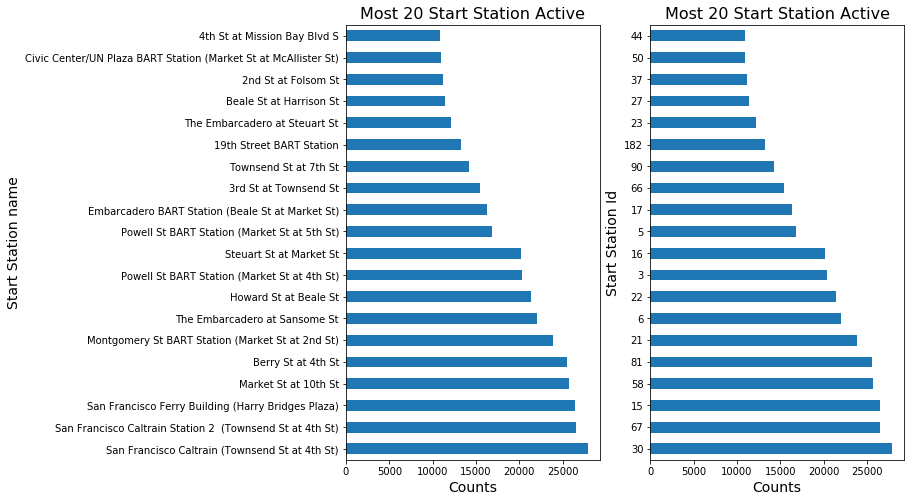

In [286]:
# the most active start_station(by Id and Name)

plt.figure(figsize=[10,8])

plt.subplot(1,2,1)
gobike_copy['start_station_name'].value_counts()[:20].plot(kind='barh')
plt.title('Most 20 Start Station Active', fontsize=16)
plt.xlabel('Counts', fontsize=14)
plt.ylabel('Start Station name', fontsize=14);

plt.subplot(1,2,2)
gobike_copy['start_station_id'].value_counts()[:20].plot(kind='barh')
plt.title('Most 20 Start Station Active', fontsize=16)
plt.xlabel('Counts', fontsize=14)
plt.ylabel('Start Station Id', fontsize=14);

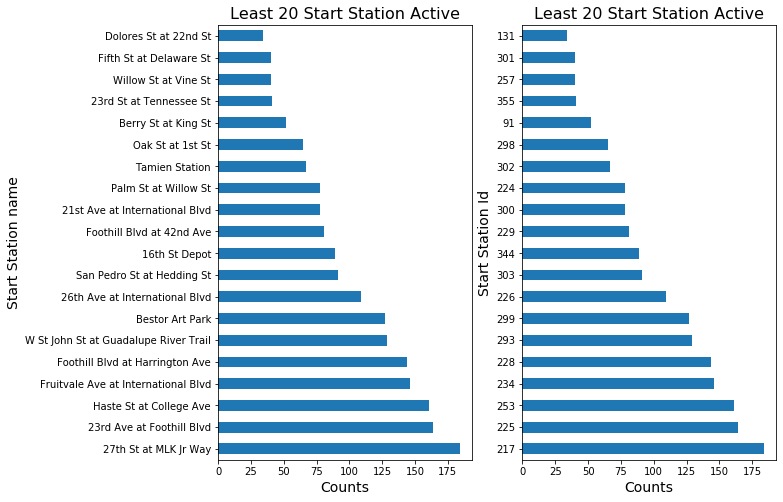

In [287]:
# the least active start_station(by Id and Name)

plt.figure(figsize=[10,8])

plt.subplot(1,2,1)
gobike_copy['start_station_name'].value_counts()[-20:].plot(kind='barh')
plt.title('Least 20 Start Station Active', fontsize=16)
plt.xlabel('Counts', fontsize=14)
plt.ylabel('Start Station name', fontsize=14);

plt.subplot(1,2,2)
gobike_copy['start_station_id'].value_counts()[-20:].plot(kind='barh')
plt.title('Least 20 Start Station Active', fontsize=16)
plt.xlabel('Counts', fontsize=14)
plt.ylabel('Start Station Id', fontsize=14);

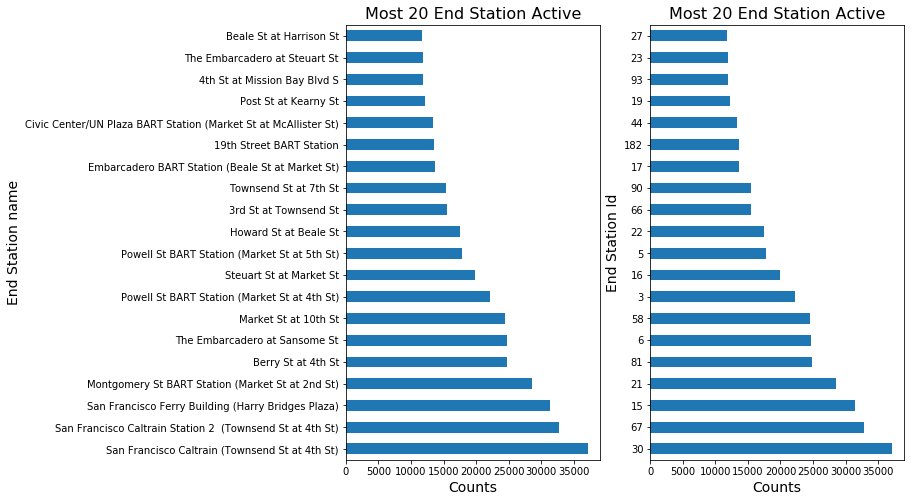

In [288]:
# the most active end_station(by Id and Name)

plt.figure(figsize=[10,8])

plt.subplot(1,2,1)
gobike_copy['end_station_name'].value_counts()[:20].plot(kind='barh')
plt.title('Most 20 End Station Active', fontsize=16)
plt.xlabel('Counts', fontsize=14)
plt.ylabel('End Station name', fontsize=14);

plt.subplot(1,2,2)
gobike_copy['end_station_id'].value_counts()[:20].plot(kind='barh')
plt.title('Most 20 End Station Active', fontsize=16)
plt.xlabel('Counts', fontsize=14)
plt.ylabel('End Station Id', fontsize=14);

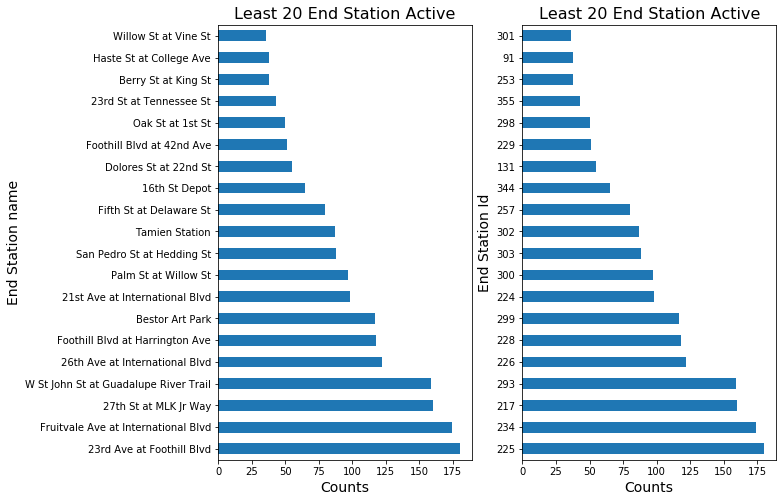

In [289]:
# the least active end_station(by Id and Name)

plt.figure(figsize=[10,8])

plt.subplot(1,2,1)
gobike_copy['end_station_name'].value_counts()[-20:].plot(kind='barh')
plt.title('Least 20 End Station Active', fontsize=16)
plt.xlabel('Counts', fontsize=14)
plt.ylabel('End Station name', fontsize=14);

plt.subplot(1,2,2)
gobike_copy['end_station_id'].value_counts()[-20:].plot(kind='barh')
plt.title('Least 20 End Station Active', fontsize=16)
plt.xlabel('Counts', fontsize=14)
plt.ylabel('End Station Id', fontsize=14);

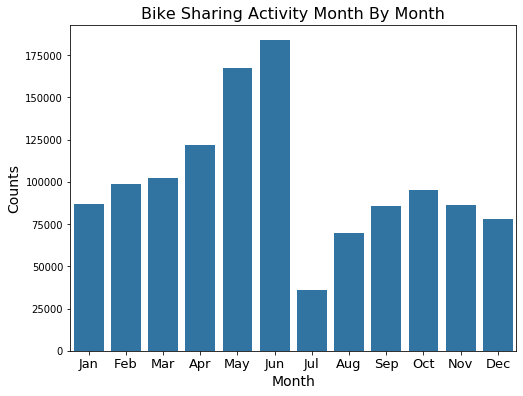

In [290]:
# bike sharing activity monthly Disribution
plt.figure(figsize=[8,6])
gen_order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
base_color=sb.color_palette()[0]
sb.countplot(data=gobike_copy, x='month', color=base_color, order=gen_order)
plt.title('Bike Sharing Activity Month By Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(fontsize=13);

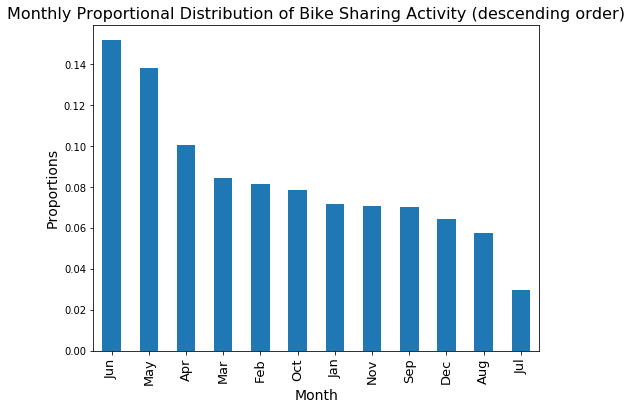

In [291]:
# monthly bike sharing activity in descending order

plt.figure(figsize=[8,6])

base_color=sb.color_palette()[0]

n_points = gobike_copy.shape[0]
month_counts=gobike_copy['month'].value_counts()
month_prop=month_counts/n_points

month_prop.plot(kind='bar', color= base_color)
plt.title('Monthly Proportional Distribution of Bike Sharing Activity (descending order)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Proportions', fontsize=14)
plt.xticks(fontsize=13);

## Distribution of member birth year

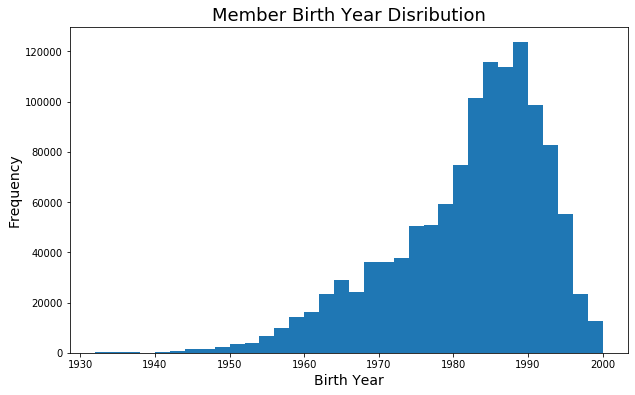

In [292]:
plt.figure(figsize=[10,6])
gobike_copy.dropna(subset = ['member_birth_year'])
bin_edges = np.arange(1932, gobike_copy['member_birth_year'].max()+2, 2)
plt.hist(data = gobike_copy, x = 'member_birth_year', bins = bin_edges);
plt.title('Member Birth Year Disribution', fontsize=18)
plt.xlabel('Birth Year', fontsize=14)
plt.ylabel('Frequency', fontsize=14);

''

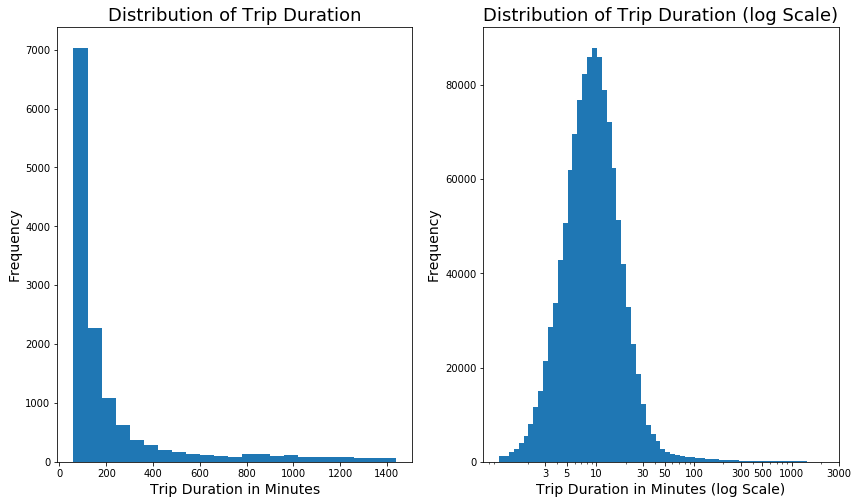

In [293]:
# Distributio of trip duratiom

plt.figure(figsize=[14,8])

plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
duration_minute= gobike_copy['duration_sec']/60
bin_edges = np.arange(60, duration_minute.max()+60, 60)
plt.hist(x = gobike_copy['duration_sec']/60, bins = bin_edges);
plt.title('Distribution of Trip Duration', fontsize=18)
plt.xlabel('Trip Duration in Minutes', fontsize=14)
plt.ylabel('Frequency', fontsize=14);

# Distributio of trip duratiom using log scale

plt.subplot(1, 2, 2) # 1 row, 3 cols, subplot 1
duration_minute= gobike_copy['duration_sec']/60
bin_edges = 10 ** np.arange(math.log10(duration_minute.min()), math.log10(duration_minute.max()) + 0.05, 0.05)
ticks = [3, 5, 10, 30, 50, 100, 300, 500, 1000, 3000]
labls = ['{}'.format(v) for v in ticks]
plt.hist(x = duration_minute, bins = bin_edges);
plt.xscale("log");
plt.xticks(ticks,labls)
plt.title('Distribution of Trip Duration (log Scale)', fontsize=18)
plt.xlabel('Trip Duration in Minutes (log Scale)', fontsize=14)
plt.ylabel('Frequency', fontsize=14);
;

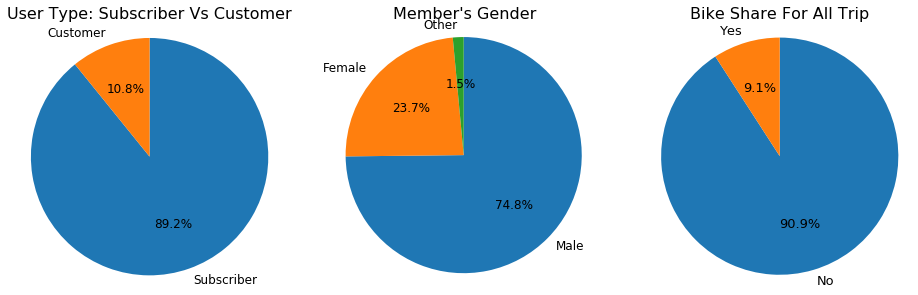

In [294]:
# user type categories using pie chart

plt.figure(figsize = [16, 16])

plt.subplot(1, 3, 1) # 1 row, 3 cols, subplot 1
sorted_counts = gobike_copy['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct='%1.1f%%', counterclock = False, textprops={'fontsize': 12});
plt.axis('square')

plt.title('User Type: Subscriber Vs Customer', fontsize=16);
 
# member gender categories
plt.subplot(1, 3, 2) # 1 row, 3 cols, subplot 2
sorted_counts = gobike_copy['member_gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct='%1.1f%%', counterclock = False, textprops={'fontsize': 12});
plt.axis('square')

plt.title("Member's Gender", fontsize=16);

# bike share for all trip percentage
plt.subplot(1, 3, 3) # 1 row, 3 cols, subplot 3
sorted_counts = gobike_copy['bike_share_for_all_trip'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct='%1.1f%%', counterclock = False, textprops={'fontsize': 13});
plt.axis('square')

plt.title('Bike Share For All Trip', fontsize=16);
 

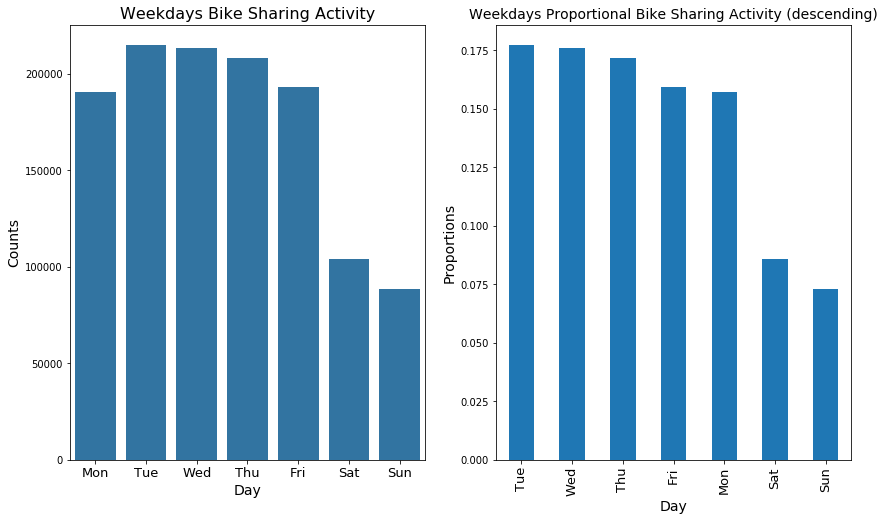

In [295]:
# weekdays bike sharing activities

plt.figure(figsize=[14,8])
base_color=sb.color_palette()[0]

# weekdays bike sharing counts
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1

gen_order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
base_color=sb.color_palette()[0]
sb.countplot(data=gobike_copy, x='day', color=base_color, order=gen_order)
plt.title('Weekdays Bike Sharing Activity', fontsize=16)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(fontsize=13);

# weekdays proportional bike sharing (in descending order)
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2

n_points = gobike_copy.shape[0]
month_counts=gobike_copy['day'].value_counts()
month_prop=month_counts/n_points

month_prop.plot(kind='bar', color= base_color)
plt.title('Weekdays Proportional Bike Sharing Activity (descending)', fontsize=14)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Proportions', fontsize=14)
plt.xticks(fontsize=13);

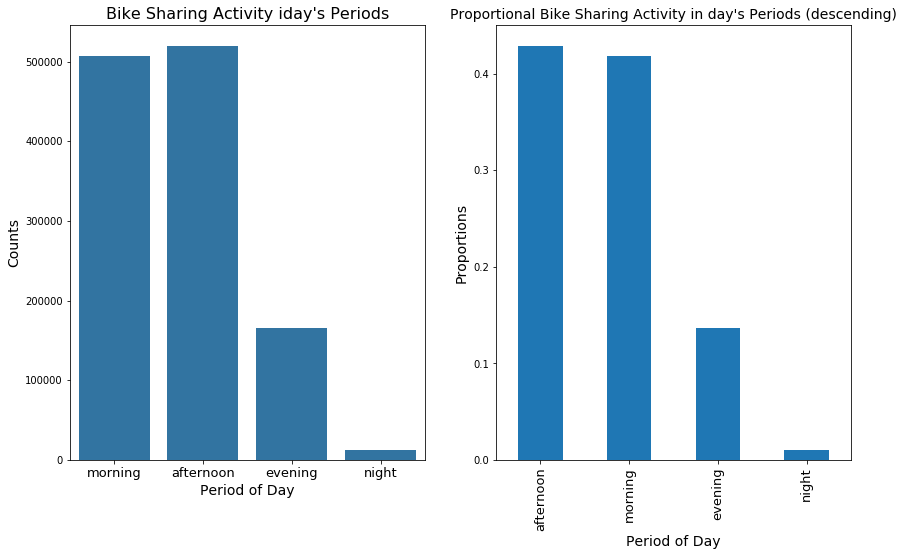

In [296]:
# period of day bike sharing activities

plt.figure(figsize=[14,8])
base_color=sb.color_palette()[0]

# counting of bike sharing activities at each period of day
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1

gen_order=['morning', 'afternoon', 'evening', 'night']
base_color=sb.color_palette()[0]
sb.countplot(data=gobike_copy, x='period_of_day', color=base_color, order=gen_order)
plt.title("Bike Sharing Activity iday's Periods", fontsize=16)
plt.xlabel('Period of Day', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(fontsize=13);

# proportional bike sharing activities at each period of day
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2

n_points = gobike_copy.shape[0]
month_counts=gobike_copy['period_of_day'].value_counts()
month_prop=month_counts/n_points

month_prop.plot(kind='bar', color= base_color)
plt.title("Proportional Bike Sharing Activity in day's Periods (descending)", fontsize=14)
plt.xlabel('Period of Day', fontsize=14)
plt.ylabel('Proportions', fontsize=14)
plt.xticks(fontsize=13);

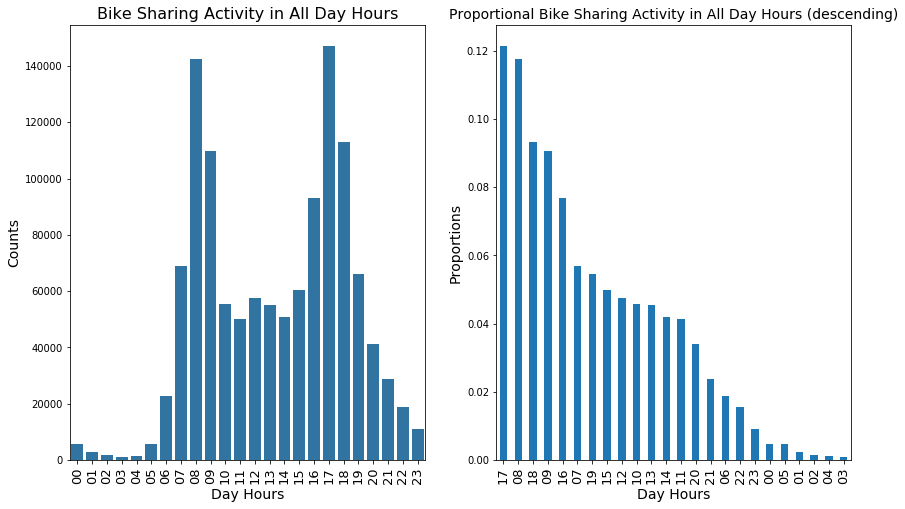

In [297]:
# bike sharing activities in each day hour
plt.figure(figsize=[14,8])
base_color=sb.color_palette()[0]

# bike sharing activities in each day hour ordered from hour= 00 till hour = 23
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1

gen_order=['00', '01', '02', '03', '04','05', '06', '07', '08','09', '10', '11', '12','13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
base_color=sb.color_palette()[0]
sb.countplot(data=gobike_copy, x='hour', color=base_color, order=gen_order)
plt.title("Bike Sharing Activity in All Day Hours", fontsize=16)
plt.xlabel('Day Hours', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(fontsize=13, rotation=90);

# proportional bike sharing activities in each day hour (in descending order)
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2

n_points = gobike_copy.shape[0]
month_counts=gobike_copy['hour'].value_counts()
month_prop=month_counts/n_points

month_prop.plot(kind='bar', color= base_color)
plt.title("Proportional Bike Sharing Activity in All Day Hours (descending)", fontsize=14)
plt.xlabel('Day Hours', fontsize=14)
plt.ylabel('Proportions', fontsize=14)
plt.xticks(fontsize=13);

## Bivariate Exploration of Data

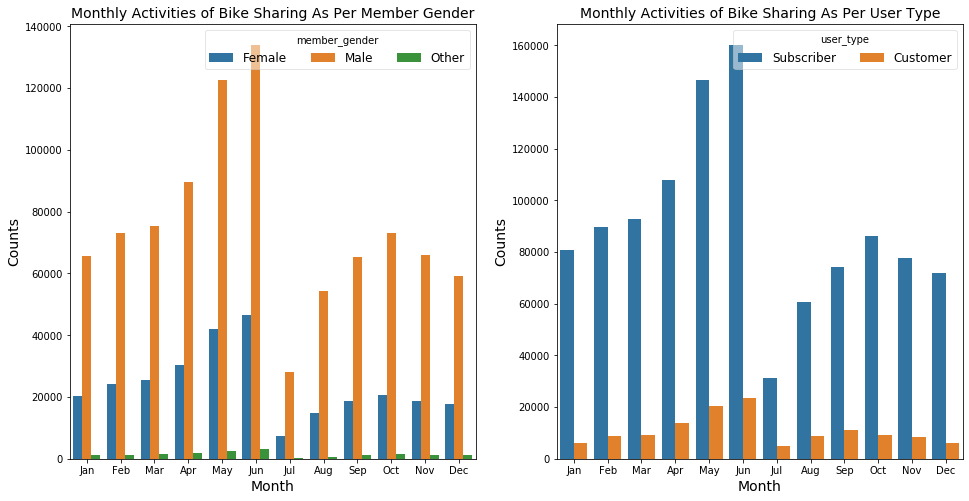

In [298]:
# bike sharing activity monthly Disribution measured by categoies of user type and member gender

plt.figure(figsize=[16,8])

gen_order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# bike sharing activity monthly Disribution for each member gender category
plt.subplot(1, 2, 1)
ax = sb.countplot(data = gobike_copy, x = 'month', hue = 'member_gender', order=gen_order)
ax.legend(loc = 1, ncol = 3, framealpha = .5, title = 'member_gender', fontsize=12);
plt.title("Monthly Activities of Bike Sharing As Per Member Gender", fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Counts', fontsize=14);

# bike sharing activity monthly Disribution for each user type category
plt.subplot(1, 2, 2)
ax = sb.countplot(data = gobike_copy, x = 'month', hue = 'user_type', order=gen_order)
ax.legend(loc = 1, ncol = 3, framealpha = 0.5, title = 'user_type', fontsize=12);
plt.title("Monthly Activities of Bike Sharing As Per User Type", fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Counts', fontsize=14);

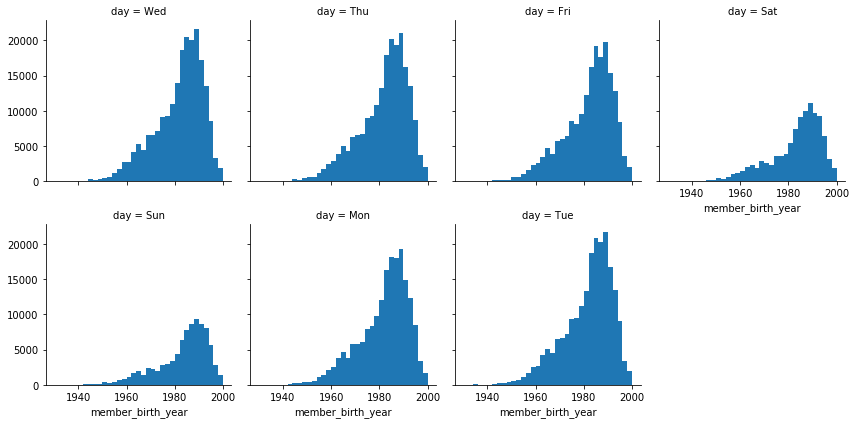

In [299]:
# Distribution member birth year counts as per weekdays
bin_edges = np.arange(1930, gobike_copy['member_birth_year'].max()+2, 2)
g = sb.FacetGrid(data = gobike_copy, col = 'day', col_wrap = 4)
g.map(plt.hist, "member_birth_year", bins = bin_edges);

In [300]:
gobike_copy.member_birth_year

0          1985
1          1981
2          1984
3          1985
4          1973
           ... 
1211662    1998
1211663    1995
1211664    1984
1211665    1985
1211666    1992
Name: member_birth_year, Length: 1211667, dtype: Int64

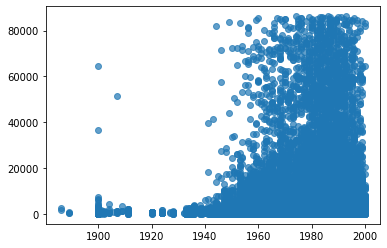

In [301]:
# scatter plot for member birth year vs duration in second
plt.scatter(data = gobike_copy, x = 'member_birth_year', y = 'duration_sec', alpha=0.7);

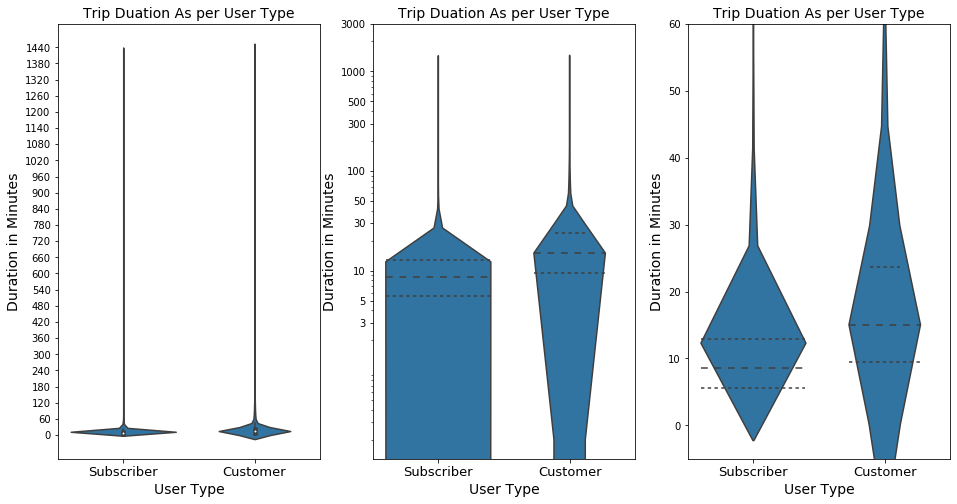

In [302]:
# trip duration according to user type categories

plt.figure(figsize=[16, 8])
base_color = sb.color_palette()[0]
duration_minute= gobike_copy['duration_sec']/60

# trip duration according to user type categories in standard scale
plt.subplot(1, 3, 1)
sb.violinplot(data = gobike_copy, x = 'user_type', y = duration_minute, color = base_color)

plt.yticks(np.arange(0, 1500, 60)) 

plt.title("Trip Duation As per User Type", fontsize=14)
plt.xlabel('User Type', fontsize=14)
plt.ylabel('Duration in Minutes', fontsize=14)
plt.xticks(fontsize=13);

# trip duration according to user type categories in log scale
plt.subplot(1, 3, 2)
bin_edges = 10 ** np.arange(math.log10(duration_minute.min()), math.log10(duration_minute.max()) + 0.05, 0.05)

sb.violinplot(data = gobike_copy, x = 'user_type', y = duration_minute, color = base_color, inner = 'quartile')


ticks = [3, 5, 10, 30, 50, 100, 300, 500, 1000, 3000]
labls = ['{}'.format(v) for v in ticks]
plt.yscale("log");
plt.yticks(ticks,labls)
plt.title("Trip Duation As per User Type", fontsize=14)
plt.xlabel('User Type', fontsize=14)
plt.ylabel('Duration in Minutes', fontsize=14)
plt.xticks(fontsize=13);

# trip duration according to user type categories in standard scale using (plt.ylim) duration limit of 25 minutes [details at area of the most concentrated data at which the standard scale can not reveal any information]
plt.subplot(1, 3, 3)
sb.violinplot(data = gobike_copy, x = 'user_type', y = duration_minute, color = base_color, inner = 'quartile')

plt.ylim([-5,60]) # set y-axis limits  

plt.title("Trip Duation As per User Type", fontsize=14)
plt.xlabel('User Type', fontsize=14)
plt.ylabel('Duration in Minutes', fontsize=14)
plt.xticks(fontsize=13);


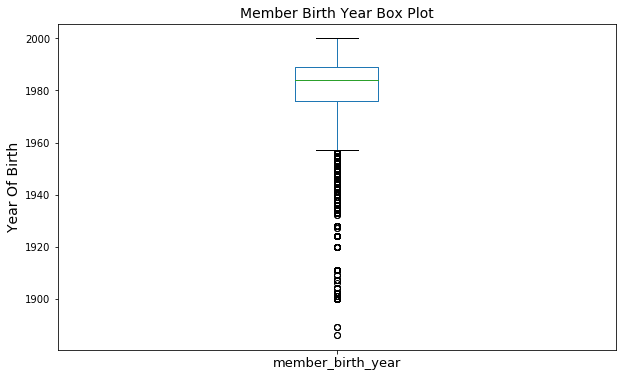

<Figure size 1008x720 with 0 Axes>

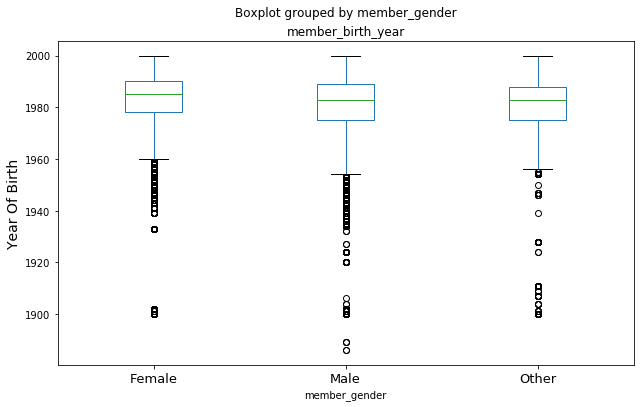

<Figure size 1008x720 with 0 Axes>

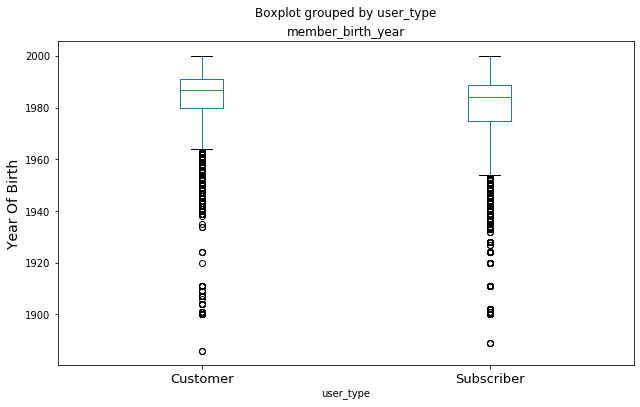

In [303]:
# member birth year box plot
plt.figure(figsize=[10,6]) 
gobike_copy.boxplot(column =['member_birth_year'], grid = False, return_type='axes', figsize=(10,6));
plt.title("Member Birth Year Box Plot", fontsize=14)
plt.ylabel('Year Of Birth', fontsize=14)
plt.xticks(fontsize=13);

# member birth year box plot as per member gender
plt.figure(figsize=[14,10]) 
gobike_copy.boxplot(by ='member_gender', column =['member_birth_year'], grid = False, return_type='axes', figsize=(10,6));
plt.ylabel('Year Of Birth', fontsize=14)
plt.xticks(fontsize=13);
plt.show()

# member birth year box plot as per user type
plt.figure(figsize=(14,10)) 
gobike_copy.boxplot(by ='user_type', column =['member_birth_year'], grid = False, return_type='axes', figsize=(10,6));
plt.ylabel('Year Of Birth', fontsize=14)
plt.xticks(fontsize=13);
plt.show()

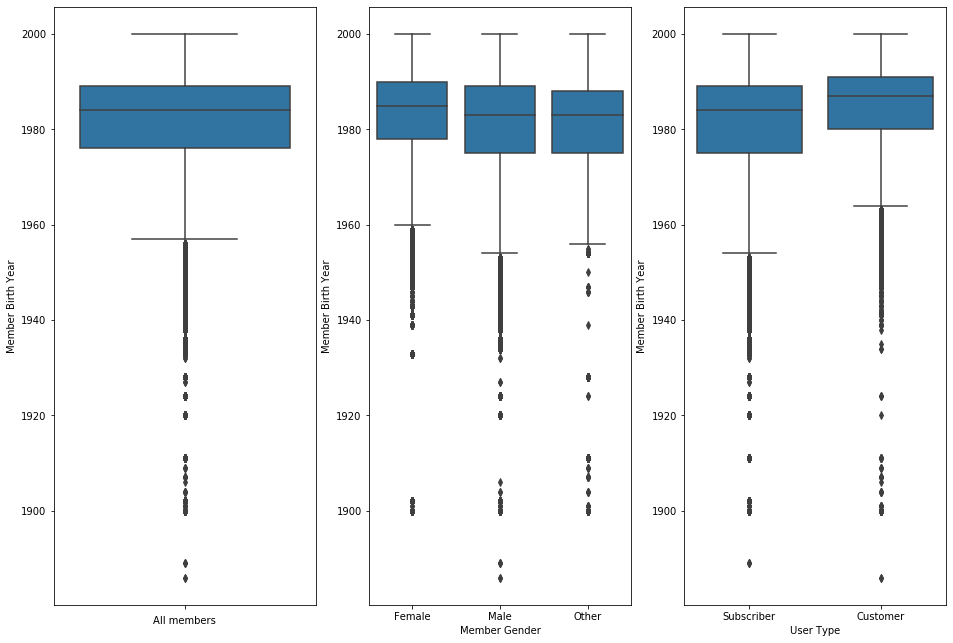

In [304]:
# the previous box plots can be substituted by the following neat & tidy ones
plt.figure(figsize=(16,11))

# member birth year distribution for all members (shared in gobike activities)
plt.subplot(1, 3, 1)
sb.boxplot(data=gobike_copy, y='member_birth_year', color=base_color);
plt.xlabel('All members');
plt.ylabel('Member Birth Year');

# member birth year box plot as per member gender
plt.subplot(1, 3, 2)
sb.boxplot(data=gobike_copy, x='member_gender', y='member_birth_year', color=base_color);
plt.xlabel('Member Gender');
plt.ylabel('Member Birth Year');

# member birth year box plot as per user type 
plt.subplot(1, 3, 3)
sb.boxplot(data=gobike_copy, x='user_type', y='member_birth_year', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Member Birth Year');

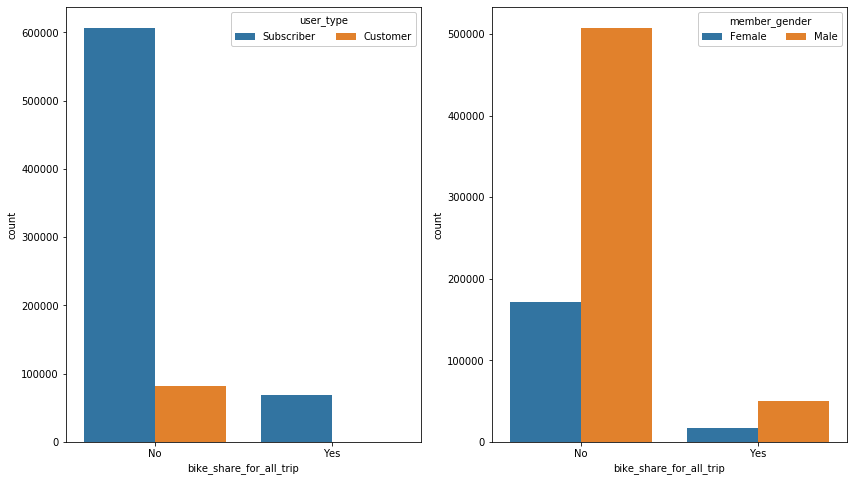

In [305]:
# counting of bike share for all trip (Yes or No)
plt.figure(figsize=[14,8])

# bike sharing for all trip as per user type
plt.subplot(1, 2, 1)
ax = sb.countplot(data = gobike_copy, x='bike_share_for_all_trip', hue = 'user_type')
ax.legend(loc = 1, ncol = 2, framealpha = 1, title = 'user_type')

# bike sharing for all trip as per member gender
plt.subplot(1, 2, 2)
gobike_copy_sub=gobike_copy.loc[gobike_copy['member_gender'].isin(['Male', 'Female'])]
ax = sb.countplot(data = gobike_copy_sub, x='bike_share_for_all_trip', hue = 'member_gender')
ax.legend(loc = 1, ncol = 2, framealpha = 1, title = 'member_gender');

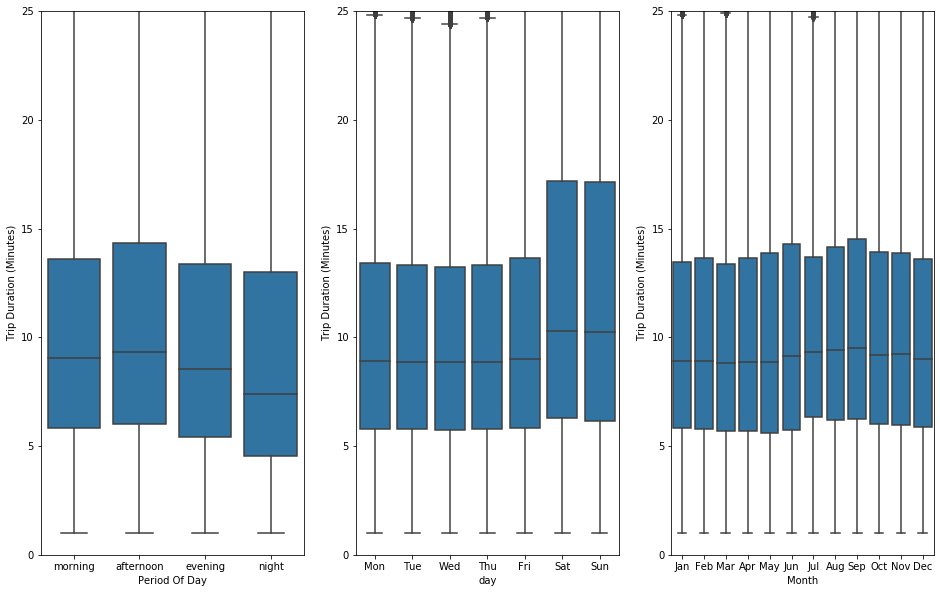

In [306]:
# trip duration
plt.figure(figsize=(16,10))
duration_minute= gobike_copy['duration_sec']/60

# trip duration according to the period of day
plt.subplot(1, 3, 1)
period_order=['morning', 'afternoon', 'evening', 'night']
sb.boxplot(data=gobike_copy, x='period_of_day', y=duration_minute, color=base_color, order=period_order);
plt.ylim([0,25])
plt.xlabel('Period Of Day');
plt.ylabel('Trip Duration (Minutes)');

# trip duration according to weekdays
plt.subplot(1, 3, 2)
day_order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.boxplot(data=gobike_copy, x='day', y=duration_minute, color=base_color, order=day_order);
plt.ylim([0,25])
plt.xlabel('day');
plt.ylabel('Trip Duration (Minutes)');

# trip duration according to month
plt.subplot(1, 3, 3)
month_order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sb.boxplot(data=gobike_copy, x='month', y=duration_minute, color=base_color, order=month_order);
plt.ylim([0,25])
plt.xlabel('Month');
plt.ylabel('Trip Duration (Minutes)');

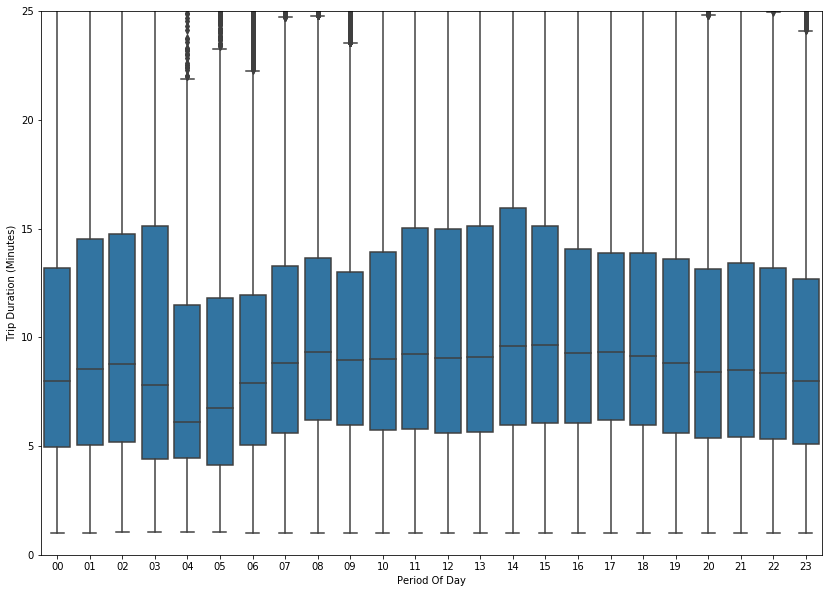

In [307]:
# trip duration according to the hour
plt.figure(figsize=(14,10))
period_order=['00', '01', '02', '03', '04','05', '06', '07', '08', '09','10', '11', '12', '13','14', '15', '16', '17', '18','19', '20', '21', '22', '23']
duration_minute= gobike_copy['duration_sec']/60
sb.boxplot(data=gobike_copy, x='hour', y=duration_minute, color=base_color, order=period_order);
plt.ylim([0,25])
plt.xlabel('Period Of Day');
plt.ylabel('Trip Duration (Minutes)');

## Multivariate Exploration of Data

In [308]:
#extracting a random subset from our big copy dataframe
np.random.seed(2018)
sample=np.random.choice(gobike_copy.shape[0], 10000, replace=False)
gobike_subset= gobike_copy.loc[sample]
gobike_subset

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,year,month,day,hour,period_of_day
1162605,1111,2018-06-22 20:12:11.767,2018-06-22 20:30:42.966,272,Woolsey St at Sacramento St,37.850578,-122.278175,180,Telegraph Ave at 23rd St,37.812678,...,1184,Subscriber,1962,Female,No,2018,Jun,Fri,20,evening
143649,435,2017-09-14 15:38:25.336,2017-09-14 15:45:40.640,243,Bancroft Way at College Ave,37.869360,-122.254337,245,Downtown Berkeley BART,37.870348,...,1169,Subscriber,1992,Female,NaN,2017,Sep,Thu,15,afternoon
544803,280,2018-02-02 07:10:27.771,2018-02-02 07:15:07.816,22,Howard St at Beale St,37.789756,-122.394643,49,S Park St at 3rd St,37.780760,...,1654,Subscriber,1982,Male,No,2018,Feb,Fri,07,morning
478671,513,2018-01-11 19:45:32.756,2018-01-11 19:54:05.993,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,6,The Embarcadero at Sansome St,37.804770,...,610,Subscriber,1965,Male,No,2018,Jan,Thu,19,evening
571002,631,2018-02-08 18:05:23.584,2018-02-08 18:15:55.010,6,The Embarcadero at Sansome St,37.804770,-122.403234,17,Embarcadero BART Station (Beale St at Market St),37.792251,...,1564,Subscriber,1971,Male,No,2018,Feb,Thu,18,afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716659,612,2018-03-26 09:26:42.528,2018-03-26 09:36:55.027,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,81,Berry St at 4th St,37.775880,...,2725,Subscriber,1978,Male,No,2018,Mar,Mon,09,morning
1154790,274,2018-06-21 18:29:20.765,2018-06-21 18:33:55.277,350,8th St at Brannan St,37.771431,-122.405787,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,...,2202,Subscriber,1992,Male,No,2018,Jun,Thu,18,afternoon
1022753,1094,2018-05-30 19:09:00.006,2018-05-30 19:27:14.271,242,Milvia St at Derby St,37.860125,-122.269384,156,Stanford Ave at Hollis St,37.838443,...,1835,Subscriber,1976,Male,No,2018,May,Wed,19,evening
641990,759,2018-03-02 08:49:17.355,2018-03-02 09:01:56.446,56,Koshland Park,37.773414,-122.427317,19,Post St at Kearny St,37.788975,...,1563,Subscriber,1976,Male,No,2018,Mar,Fri,08,morning


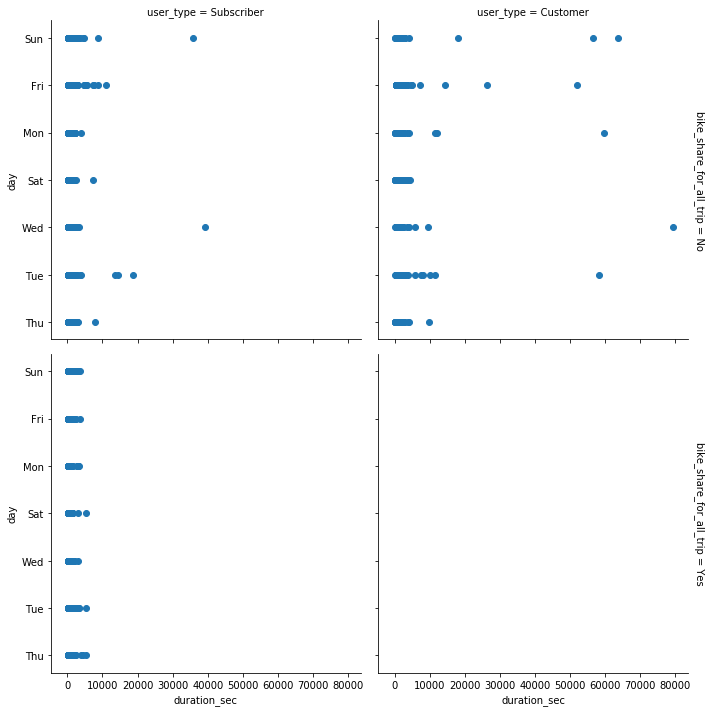

In [309]:
# duration of trips in weekdays according to user type categoies 
g=sb.FacetGrid(data=gobike_subset, col='user_type', row='bike_share_for_all_trip', height=5, margin_titles=True)
g.map(plt.scatter, 'duration_sec', 'day');

<Figure size 1008x720 with 0 Axes>

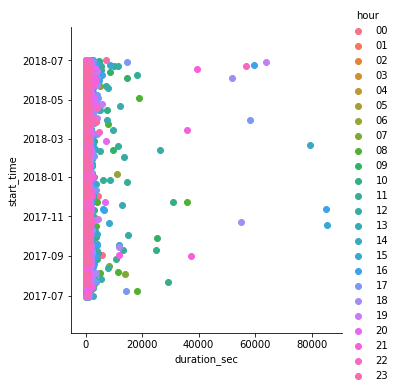

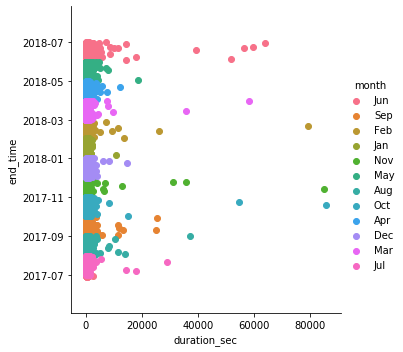

In [310]:
plt.figure(figsize=(14,10))

g = sb.FacetGrid(data = gobike_subset, hue = 'hour', height = 5)
g.map(plt.scatter, 'duration_sec', 'start_time', alpha=1)
g.add_legend()


g = sb.FacetGrid(data = gobike_subset, hue = 'month', height = 5)
g.map(plt.scatter, 'duration_sec', 'end_time', alpha=1)
g.add_legend();

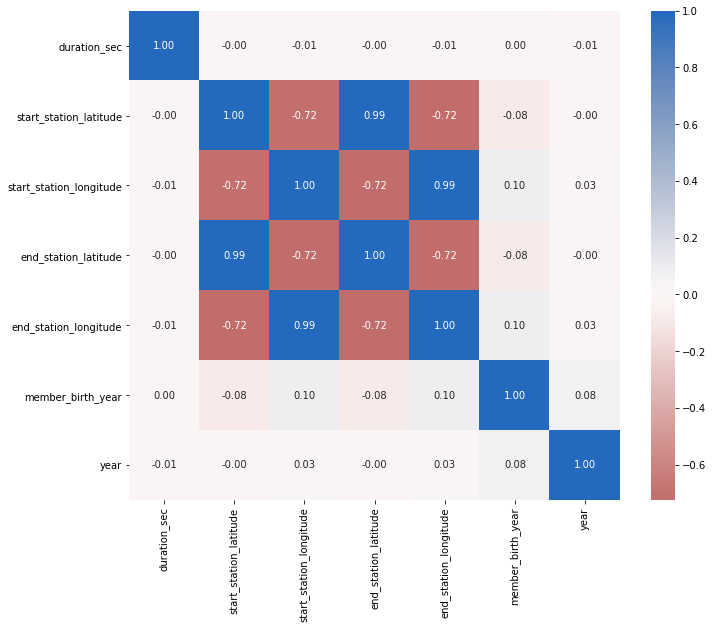

In [311]:
# correlation coefficient strengths
plt.figure(figsize=(11,9))
sb.heatmap(gobike_subset.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

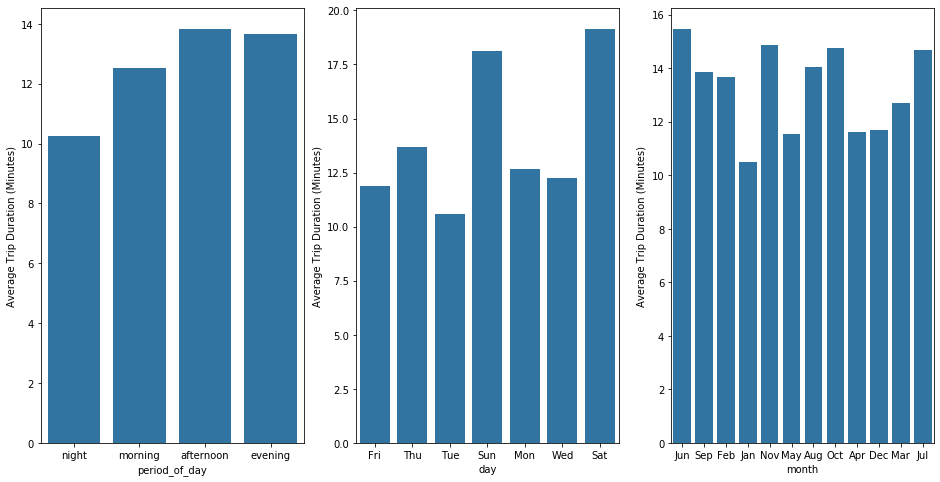

In [312]:
# Average trip duration barplots

plt.figure(figsize=[16, 8])

duration_minute= gobike_subset['duration_sec']/60

# Average trip duration according to period of day
plt.subplot(1, 3, 1)
ax = sb.barplot(data = gobike_subset, x = 'period_of_day', y = duration_minute, color=base_color, ci=None)
plt.ylabel('Average Trip Duration (Minutes)');

# Average trip duration according to weekdays
plt.subplot(1, 3, 2)
ax = sb.barplot(data = gobike_subset, x = 'day', y = duration_minute, color=base_color, ci=None)
plt.ylabel('Average Trip Duration (Minutes)');            

# Average trip duration according the month
plt.subplot(1, 3, 3)
ax = sb.barplot(data = gobike_subset, x = 'month', y = duration_minute, color=base_color, ci=None)
plt.ylabel('Average Trip Duration (Minutes)');

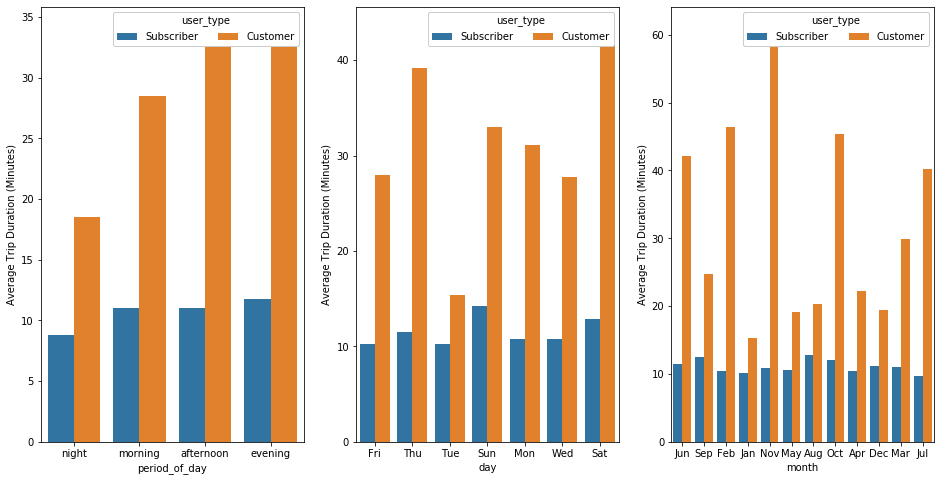

In [313]:
# Average trip duration for each user type
plt.figure(figsize=[16, 8])

duration_minute= gobike_subset['duration_sec']/60

# Average trip duration on period of day for each user type
plt.subplot(1, 3, 1)
ax = sb.barplot(data = gobike_subset, x = 'period_of_day', y = duration_minute, hue = 'user_type', ci=None)
ax.legend(loc = 1, ncol = 3, framealpha = 1, title = 'user_type');
plt.ylabel('Average Trip Duration (Minutes)');

# Average trip duration on weekdays for each user type
plt.subplot(1, 3, 2)
ax = sb.barplot(data = gobike_subset, x = 'day', y = duration_minute, hue = 'user_type', ci=None)
ax.legend(loc = 1, ncol = 3, framealpha = 1, title = 'user_type')
plt.ylabel('Average Trip Duration (Minutes)');            

# Average trip duration on months for each user type
plt.subplot(1, 3, 3)
ax = sb.barplot(data = gobike_subset, x = 'month', y = duration_minute, hue = 'user_type', ci=None)
ax.legend(loc = 1, ncol = 3, framealpha = 1, title = 'user_type')
plt.ylabel('Average Trip Duration (Minutes)');

## Explanatory Visualizations


#### Now it is time to answer our posed questions and summarize the main findings:
### 1. When are the most numbers of trips taken in terms of:
###     - period of day (morning, afternoon, evening and night)
###     - weekdays (monday to sunday)
###     - month of year (january till december)

#### starting with the first term (period of day):  most trips are taken at the afternoon and morning times, the percentage of trips that are taken at afternoon time is about 43%, we may give the following percentage for each period of day:
####  - afternoon time: about: 43%
####  - morning time: about  : 42%
####  - evening time: about   : 14%
####  - night time: about        : 1%
#### in the other hand the most trips are taken at weekdays are in Tuesday, Wednesday and Thursday (about 17.5% plus / minus, the peak value is on Tuesdays) then it descends gradually till it reachs to the undermost values (about 8.5% and 7.5%) on Saturdays and Sundays respectively (or on weekends)

#### in term of month of years: the maximum numbers of trips are taken in June month with about 15.2% then May with about 14% of the total trips. the least number of trips are taken in July with only about 3%.

### 2. What is the average trip duration:

#### the average trip duration takes about 16 minutes. though our minimum trip duration is only about one minute, the maximum trip period is about 1440 minutes this equals 24 hours or one entire day. 

### 3. What is the average trip duration in term of:
###     - period of day (morning, afternoon, evening and night)
###     - weekdays (monday to sunday)
###     - month of year (january till december)

#### the average trip duration regardless of any constraints of time is 16 minutes
#### in term of period of day, the longest average trip duration are on mornings and afternoons, the average trip durations are:
#### - morning time  : about 13.5 minutes
#### - afternoon time: about 13.0 minutes
#### - evening time  : about 11.5 minutes
#### - night time       : about 10.0 minutes
#### in case of weekdays, the longest average trip duration are on Sundays and Saturdays (or on weekends)
#### the distribution of average trip duration on the weekdays has its maximum value of about 17 minutes on Sundays then about 16 minutes on Saturdays (the maximum average is in weekends) then the value line goes down to the least value of about 11 minutes on Mondays

#### in case of months of year, the longest trip duration is in July with about 18.25 minutes then November and September with about 15 minutes, the least average trip duration is in June and December with about 11 minutes.

### 4. Are the above depend on user type or not

#### the answer is yes,
#### the average trip duration in minutes for each user type are as follows:
#### - period of day
####     -- in case of subscribers:the average trip duration at morning and afternoon times will be about 11.5 minutes, this value will come down at evening and night to about 10 minutes.
####     -- in case of customers: the average trip duration will be at its peak in the morning time of about 35 minutes, then it goes down in afternoon time to about 27 minutes then to 23 minutes at evening time and finally to about 13 minutes at night period.
#### - weekdays: the same scenario is noted on weekdays, as the average trip duration for the subscribers are more balanced scale (almost constant or not changing much from day to day) and further less than the customers average trip duration. the subscriber average trip duration in its heighest level in Sundays for about 13 minutes then Saturdays in 12 minutes then it goes to its minimum at Wednesdays about 10 minutes. 
#### in the contrary the customer average trip duration have a maximum value of about 33 minutes on Sundays, 32 minutes on Saturdays, 31 minutes in Tuesdays and it goes down to its minimum in Mondays with average trip duration equals about 18 minutes.
#### - going to month scale: the same pattern will continue in case of subscribers with average trip duration of about 10 minutes for all months of year with a rise in this value to about 13 minutes in November. 
#### in case of customers: our peak value of the average trip duration is in July with a value of about 80 minutes, then it goes down dramatically to about 38 minutes in April and it reaches its bottom value in June and November with average trip duration equal to about 20 minutes.

### 5. what other insights we may find from above.
#### we can conclude from above results that although the least number of trips are taken on Saturdays and Sundays (or on weekends), but the average trip duration has its maximum on weekends (Saturdays and Sundays). this means that there is a limit numbers of members will hire these bikes on weekends (so the number of trips are at its minimum value) but they will keep the bike for a longer time and maybe for daylong (they may need these bikes in having fun and in their weekend various activities) and this will make the average trip duration has its utmost value on weekends. 
#### in the contrary the number of trips are taken on other days (working days) epecially on Tuesdays, Wednesdays and Thurdays is much higher from these taken on Weekends, but the avearge trip duration on these days (working days) is much less or limit. apparently members use the bikes to reach their work locations.
#### in a bar plot (in univariate section) for proportion of bike hiring during the hours of day (along 24 hours): the maximum proportion (about 12%) is on 8 o'clock, morning and 5 o'clock afternoon. this means that the most bike sharing activities are used in going to work (8 o'clock in the mornings) and back home (5 o'clock in the afternoons) at rush hours. the second position (9.5%) goes to the period of (9 am) and (6 pm) each of them is time after the rush hour, going work time (8 am + 9 am) then back home (5 pm + 6 pm). accordingly the total proportion for these four hours (12% + 12% + 9.5% + 9.5%= 43%). and this a nother clue of using the bikes in reaching work locations and back home.  

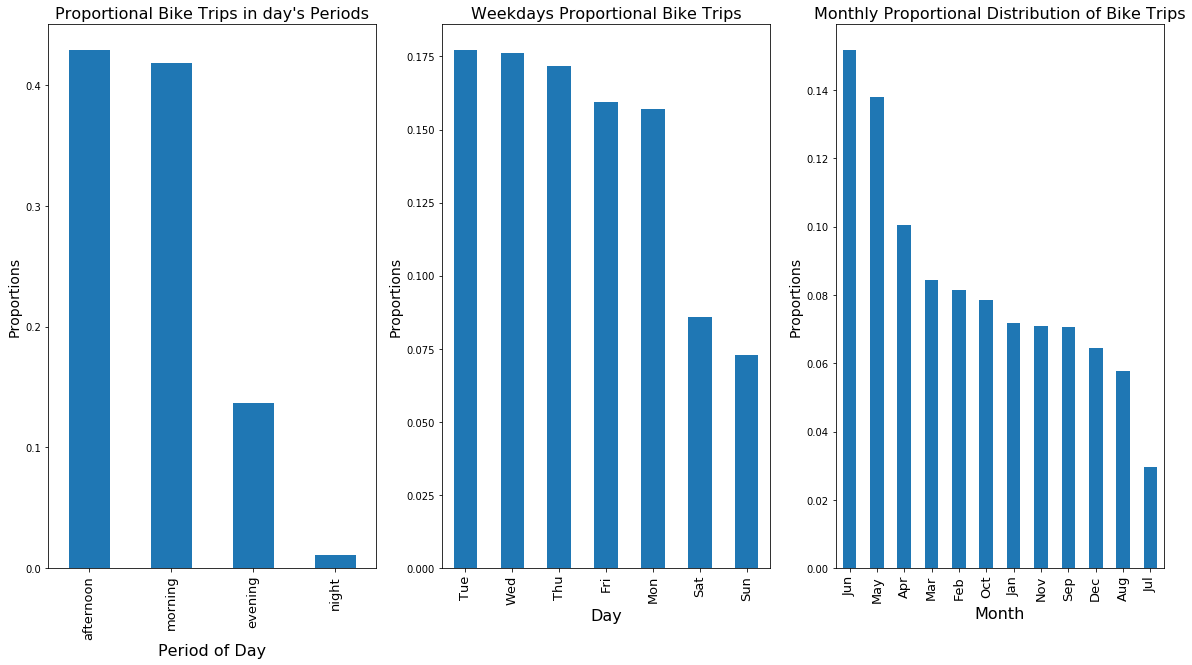

In [314]:
# proportional bike sharing at different time scale
plt.figure(figsize=[20,10])
base_color=sb.color_palette()[0]

# period of day proportional bike sharing (in descending order)
plt.subplot(1, 3, 1) # 1 row, 3 cols, subplot 1
n_points = gobike_copy.shape[0]
month_counts=gobike_copy['period_of_day'].value_counts()
month_prop=month_counts/n_points

month_prop.plot(kind='bar', color= base_color)
plt.title("Proportional Bike Trips in day's Periods", fontsize=16)
plt.xlabel('Period of Day', fontsize=16)
plt.ylabel('Proportions', fontsize=14)
plt.xticks(fontsize=13);


# weekdays proportional bike sharing (in descending order)
plt.subplot(1, 3, 2) # 1 row, 3 cols, subplot 2

n_points = gobike_copy.shape[0]
month_counts=gobike_copy['day'].value_counts()
month_prop=month_counts/n_points

month_prop.plot(kind='bar', color= base_color)
plt.title('Weekdays Proportional Bike Trips', fontsize=16)
plt.xlabel('Day', fontsize=16)
plt.ylabel('Proportions', fontsize=14)
plt.xticks(fontsize=13);

# monthly bike sharing activity in descending order

plt.subplot(1, 3, 3) # 1 row, 3 cols, subplot 3


n_points = gobike_copy.shape[0]
month_counts=gobike_copy['month'].value_counts()
month_prop=month_counts/n_points

month_prop.plot(kind='bar', color= base_color)
plt.title('Monthly Proportional Distribution of Bike Trips', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Proportions', fontsize=14)
plt.xticks(fontsize=13);

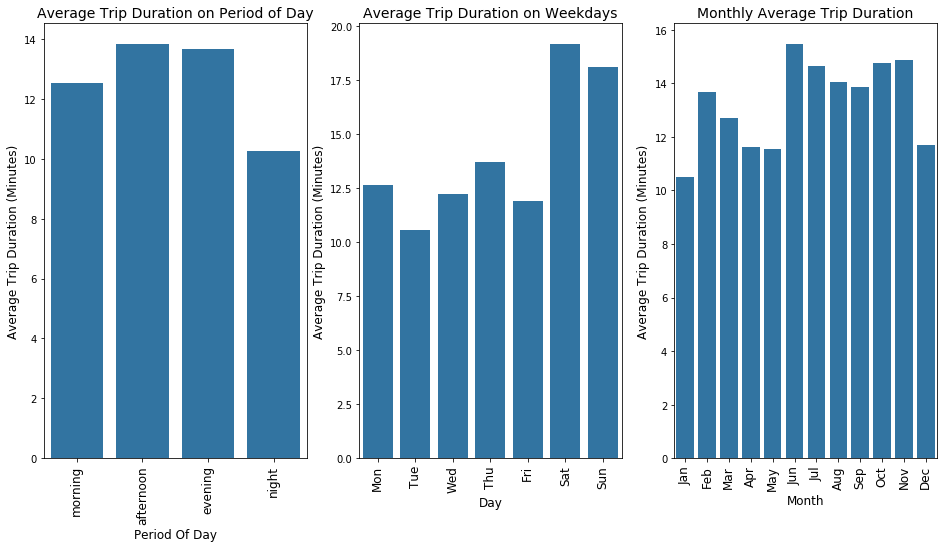

In [315]:
# Average trip duration for each user type
plt.figure(figsize=[16, 8])
base_color=sb.color_palette()[0]
duration_minute= gobike_subset['duration_sec']/60


# Average trip duration on period of day for each user type
plt.subplot(1, 3, 1)
period_order=['morning', 'afternoon', 'evening', 'night']
ax = sb.barplot(data = gobike_subset, x = 'period_of_day', y = duration_minute, order= period_order, color=base_color, ci=None)
plt.title('Average Trip Duration on Period of Day', fontsize=14)
plt.xlabel('Period Of Day', fontsize=12); 
plt.ylabel('Average Trip Duration (Minutes)', fontsize=12);
plt.xticks(fontsize=12, rotation=90)

# Average trip duration on weekdays for each user type
plt.subplot(1, 3, 2)
day_order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax = sb.barplot(data = gobike_subset, x = 'day', y = duration_minute, color=base_color, order= day_order, ci=None)
plt.title('Average Trip Duration on Weekdays', fontsize=14)
plt.xlabel('Day', fontsize=12); 
plt.ylabel('Average Trip Duration (Minutes)', fontsize=12);            
plt.xticks(fontsize=12, rotation=90)

# Average trip duration on months for each user type
plt.subplot(1, 3, 3)
month_order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax = sb.barplot(data = gobike_subset, x = 'month', y = duration_minute, color=base_color, order= month_order, ci=None)
plt.title('Monthly Average Trip Duration', fontsize=14)
plt.xlabel('Month', fontsize=12); 
plt.ylabel('Average Trip Duration (Minutes)', fontsize=12)
plt.xticks(fontsize=12, rotation=90);

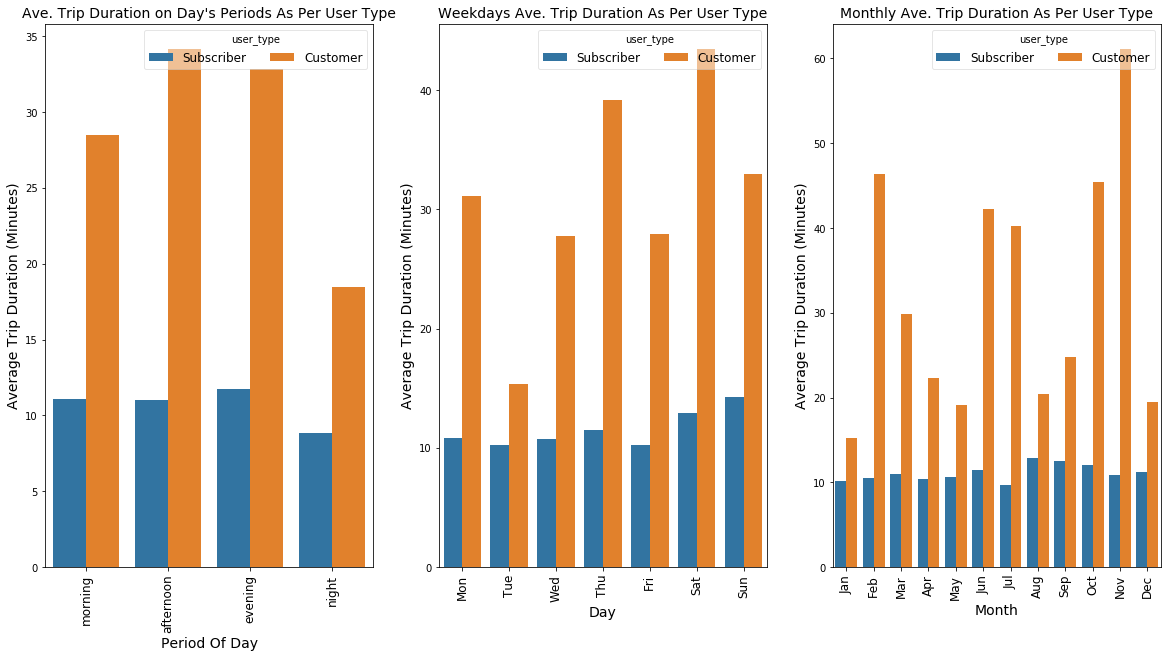

In [316]:
# Average trip duration for each user type
plt.figure(figsize=[20, 10])

duration_minute= gobike_subset['duration_sec']/60

# Average trip duration on period of day for each user type
plt.subplot(1, 3, 1)
period_order=['morning', 'afternoon', 'evening', 'night']
ax = sb.barplot(data = gobike_subset, x = 'period_of_day', y = duration_minute, hue = 'user_type', order= period_order, ci=None)
ax.legend(loc = 1, ncol = 3, framealpha = .5, title = 'user_type', fontsize=12);
plt.title("Ave. Trip Duration on Day's Periods As Per User Type", fontsize=14)
plt.xlabel('Period Of Day', fontsize=14); 
plt.ylabel('Average Trip Duration (Minutes)', fontsize=14);
plt.xticks(fontsize=12, rotation=90);

# Average trip duration on weekdays for each user type
plt.subplot(1, 3, 2)
day_order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax = sb.barplot(data = gobike_subset, x = 'day', y = duration_minute, hue = 'user_type', order= day_order, ci=None)
ax.legend(loc = 1, ncol = 3, framealpha = .5, title = 'user_type', fontsize=12)
plt.title('Weekdays Ave. Trip Duration As Per User Type', fontsize=14)
plt.xlabel('Day', fontsize=14); 
plt.ylabel('Average Trip Duration (Minutes)', fontsize=14);            
plt.xticks(fontsize=12, rotation=90);

# Average trip duration on months for each user type
plt.subplot(1, 3, 3)
month_order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax = sb.barplot(data = gobike_subset, x = 'month', y = duration_minute, hue = 'user_type', order= month_order, ci=None)
ax.legend(loc = 1, ncol = 3, framealpha = 0.5, title = 'user_type', fontsize=12)
plt.title('Monthly Ave. Trip Duration As Per User Type', fontsize=14)
plt.xlabel('Month', fontsize=14); 
plt.ylabel('Average Trip Duration (Minutes)', fontsize=14);
plt.xticks(fontsize=12, rotation=90);

In [320]:
jupyter nbconvert "C:\Users\mak\slide_deck_notebook_name3.ipynb" --to slides --ServePostProcessor.port=8910 --post serve

SyntaxError: invalid syntax (<ipython-input-320-f99fa2917257>, line 1)